<a href="https://colab.research.google.com/github/RafDingo/Maths40/blob/main/Maths40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exoplanet Discoverability using Linear Regression

## ***`Contents`***

* [Introduction](#Introduction)
    * [Dataset Source](#Dataset_Source)
    * [Dataset Details](#Dataset_Details)
    * [Dataset Variables](#Dataset_Variables)
    * [Response Variables](#Response_Variables)
    * [Goals and Objectives](#Goals_and_Objectives)
    * [Data Import](#import_dataset)

* [Data Cleaning and Preprocessing](#Data_Cleaning_and_Preprocessing)
    * [Create Data Branch](#create_data_branch)
    * [Removing Unnecessary Columns](#Removing_Unnecessary_Columns)
        * [Renaming Columns](#Rename_Columns)
    * [Calculate Additional Columns](#Calculate_Additional_Columns)
        * [Data Properties](#Data_Properties)
    * [Finding Outliers](#Finding_Outliers)
    * [Processing Rows](#Processing_Rows)
        * [Dropping NaN Values](#dropping_nan_values)

* [Summary & Conclusions](#Summary_and_Conclusions)
* [Literature Review](#Literature_Review)
* [References](#References)


---



## ***`Introduction`*** <a name="Introduction"></a>



Humanity have discovered thousands of planets outside of our solar system, using a variety of methods. What most of these methods have in common, is the detection of an anomoly in a signal from avisible star. This could be an exo-planet passing in front of the star from our perspective, lowering its brightness, or a wobble imparted by the mass of a planet, as both the planet's and star's gravity pulls at eachother.
We suspect that the methods used to discover planets, would impart a bias on the way which we discover these bodies, and hope to exoplore this link. 


### **Dataset Source** <a name="Dataset_Source"></a>


This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program (1)

The data is sourced from multiple missions which had/have the goal of discoving exo-planets. TESS, Kepler, K2, KELT and UKIRT.


### **Dataset Details** <a name="Dataset_Details"></a>


The dataset is a subset of information provided by NASA about all discovered Exo-planets. An exoplanet or extra-solar planet any planet sized body outside of our solar system. These can either orbit another star, or be star-less. (2)

NASA's archive provides many features, which we limited to 28.
After futher filtering features which are not applicable to our study, we have 18 features, and 4521 entries.

### **Dataset Variables** <a name="Dataset_Variables"></a>
The features in our dataset are described in the table below.

In [261]:
from tabulate import tabulate

from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['sy_snum', 'Numeric', 'NA', 'Number of stars in the system'],
         ['sy_pnum', 'Numeric', 'NA', 'Number of planets in the system'],
         ['cb_flag', 'Nominal categorical', 'NA', 'Circumbinary flag: whether the planet orbits 2 stars'],
         ['pl_orbper', 'Numeric', 'Earth days', 'Orbital period (Time it takes planet to complete an orbit'],
         ['pl_orbsmax', 'Numeric', 'au', 'Orbit semi-Major Axis. au is the distance from Earth to sun.'],
         ['pl_rade', 'Numeric', 'Earth radius', 'Planet radius, where 1.0 is Earth\'s radius'],
         ['pl_bmasse', 'Numeric', 'Earth Mass', 'Planetary Mass, where 1.0 is Earth\'s mass'],
         ['pl_orbeccen', 'Numeric', 'NA', 'Planet\s orbital eccentricity'],
         ['pl_eqt', 'Numeric', 'Kelvin', 'Equilibrium Temperature: (The planetary equilibrium temperature is a the theoretical temperature that a planet would be a black body being heated only by its parent star)'],
         ['st_teff', 'Numeric', 'Kelvin', 'Stellar Effective Temperature'],
         ['st_rad', 'Numeric', 'Solar Radius', 'Stellar Radius, where 1.0 is 1 of our Sun\'s radius'],
         ['st_mass', 'Numeric', 'Solar Mass', 'Stellar Mass, where 1.0 is 1* our Sun\'s mass'],
         ['st_lum', 'Numeric', 'log(Solar luminosity)', 'Stellar Luminosity'],
         ['st_age', 'Numeric', 'gyr (Gigayear)', 'Stellar Age'],
         ['glat', 'Numeric', 'degrees', 'Galactic Latitude'],
         ['glon', 'Numeric', 'degrees', 'Galactic Longitude'],
         ['sy_dist', 'Numeric', 'parsec', 'Distance'],
         ['sy_plx', 'Numeric', 'mas (miliarcseconds)', 'Parallax: Distance the star moves in relation to other objects in the night sky'],
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤═════════════════════╤═══════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Name        │ Data Type           │ Units                 │ Description                                                                                                                                                                │
╞═════════════╪═════════════════════╪═══════════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ sy_snum     │ Numeric             │ NA                    │ Number of stars in the system                                                                                                                                              │
├─────────────┼─────────────────────┼───────────────────────

### **Response Variables** <a name="Response_Variables"></a>


Our reponse variable is sy_pnum. This is the number of exo-planets detected in the star system of the exo-planet.

As our study focuses on planet discoverability, this is the most logical response variable.


### **Goals and Objectives** <a name="Goals_and_Objectives"></a>


Our goal is to visualize and explore the correlation between features of a discovered exo-planet, its star, and the amount of planets discovered in its system.

These correlations should provide us with insights regarding how these features affect the likelihood of an exo-planet being discovered.

SWITCH THE ABOVE TWO PARAS AROUND.

We will explore many relationships in our data, including:

A planet's:
* Mass
* Radius
* Orbital Period
* Orbital distance (Semi-major Axis)
* Orbital eccentricity 
* Surface temperature

The star's:
* Temperature
* Radius
* Mass
* Luminosity
* Age
* Position (Relative to the galaxy)
* Parallax
* Distance from the Solar system.

We will also derive the ratio between the planet and star's radii, temperatures and masses, and explore these relationships. <- EXPAND

### **Import Dataset** <a name="import_dataset"></a>


In [262]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
sns.set(rc={"figure.dpi":150, 'savefig.dpi':300})

# For mac users
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [263]:
url = 'https://raw.githubusercontent.com/RafDingo/Maths40/main/data/exoPlanets.csv'
df_main = pd.read_csv(url, error_bad_lines=False, index_col=False)

In [264]:
print('Shape:', df_main.shape)
df_main.sample(10, random_state=999)

Shape: (4521, 28)


,loc_rowid,sy_snum,sy_pnum,sy_mnum,cb_flag,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_insol,pl_eqt,ttv_flag,st_spectype,st_teff,st_rad,st_mass,st_metratio,st_lum,st_logg,st_age,st_rotp,glat,glon,sy_pmdec,sy_dist,sy_plx
3009,3010,1,3,0,0,6.988055,0.0690,1.150,7.300,26.400000,0.00000,101.84,914.0,0,NaN,5631.00,0.80,0.93,[M/H],-0.313,4.59,4.37,NaN,13.51572,80.80071,-7.505880,616.637000,1.593200
1852,1853,1,1,0,0,10.458434,0.0845,1.330,2.330,5.440000,0.00000,24.21,609.0,0,NaN,4730.00,0.72,0.76,[Fe/H],-0.727,4.62,3.98,NaN,18.96771,79.57519,-7.082450,342.509000,2.890830
2512,2513,1,1,0,0,33.496900,0.2008,1.260,2.120,5.830000,0.00000,37.30,630.0,0,NaN,4681.53,0.77,0.75,[M/H],-0.588,4.54,NaN,NaN,15.04776,74.44132,-19.463100,247.771000,4.007050
1469,1470,1,4,0,0,5.577212,0.0400,1.080,1.280,5.580000,0.11000,8.50,NaN,0,NaN,3360.47,0.33,0.27,NaN,-1.837,4.90,NaN,NaN,-49.94032,51.46106,74.339100,66.432100,15.024200
3589,3590,1,1,0,0,2.237493,0.0325,1.330,2.330,5.440000,0.00000,336.67,1160.0,0,NaN,5099.00,0.76,0.80,[Fe/H],-0.501,4.58,4.90,NaN,12.92363,73.89376,0.090604,591.776000,1.661150
3347,3348,1,1,0,0,18.684049,0.1396,2.630,7.410,2.240000,0.00000,176.23,832.0,0,NaN,5573.00,1.15,0.95,[Fe/H],0.525,4.29,10.47,NaN,11.33166,80.68890,1.326260,992.852000,0.978491
4251,4252,1,7,0,0,2.421937,0.0158,1.097,1.308,5.463993,0.00654,2.21,342.0,1,NaN,2566.00,0.12,0.09,[Fe/H],-3.257,5.24,0.50,1.4,-56.64891,69.71519,-492.000000,12.429889,80.451243
2436,2437,1,1,0,0,9.878482,0.0932,2.580,7.180,2.300000,0.00000,187.85,1003.0,0,NaN,6150.00,1.18,1.12,[Fe/H],0.145,4.34,3.16,NaN,19.93538,78.45346,7.767660,1031.310000,0.940878
2654,2655,1,3,0,0,3.619337,0.0460,1.480,2.790,4.730000,0.00000,460.66,1156.0,0,NaN,5502.00,1.06,1.02,[Fe/H],0.009,4.39,6.30,NaN,11.28870,79.45283,20.872000,656.380000,1.494720
2570,2571,1,2,0,0,2.061897,0.0320,1.680,3.460,4.010000,0.00000,1069.23,1463.0,0,NaN,6021.00,1.14,0.98,[Fe/H],0.034,4.35,5.80,NaN,19.64002,73.51949,-14.774300,968.544000,1.003920


Add target variable to the end of the table 

In [265]:
temp = df_main['sy_pnum']
del df_main['sy_pnum']
df_main['sy_pnum'] = temp
df_main.head(5)

,loc_rowid,sy_snum,sy_mnum,cb_flag,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_insol,pl_eqt,ttv_flag,st_spectype,st_teff,st_rad,st_mass,st_metratio,st_lum,st_logg,st_age,st_rotp,glat,glon,sy_pmdec,sy_dist,sy_plx,sy_pnum
0,1,2,0,0,326.03000,1.29,12.1,6165.6000,19.10,0.231,NaN,NaN,0,G8 III,4742.0,19.00,2.70,[Fe/H],2.243,2.31,NaN,NaN,78.28058,264.13775,88.1701,93.1846,10.71040,1
1,2,1,0,0,516.21997,1.53,12.3,4684.8142,13.80,0.080,NaN,NaN,0,K4 III,4213.0,29.79,2.78,[Fe/H],2.430,1.93,1.56,NaN,41.04437,108.71900,10.1132,125.3210,7.95388,1
2,3,1,0,0,185.84000,0.83,12.9,1525.5000,3.90,0.000,NaN,NaN,0,K0 III,4813.0,11.00,2.20,[Fe/H],1.763,2.63,4.50,NaN,-21.05141,106.41269,-83.7582,75.4392,13.22890,1
3,4,1,0,0,1773.40002,2.93,12.9,1481.0878,3.79,0.370,NaN,NaN,0,K0 V,5338.0,0.93,0.90,[Fe/H],-0.153,4.45,3.90,NaN,46.94447,69.16849,-296.4640,17.9323,55.73630,2
4,5,3,0,0,798.50000,1.66,13.5,565.7374,1.26,0.680,NaN,NaN,0,G3 V,5750.0,1.13,1.08,[Fe/H],0.097,4.36,7.40,NaN,13.20446,83.33558,-162.4930,21.1397,47.27540,1


---

## ***`Data Cleaning and Preprocessing`*** <a name="Data_Cleaning_and_Preprocessing"></a>

### 📃 **Instructions**
In general, the following steps will be necessary for data preparation **in this specific order**:
1. Outliers and unusual values (such as a negative age) are taken care of: they are either imputed, dropped, or set to missing values.
2. Missing values are imputed or the rows containing them are dropped.
3. Any categorical descriptive feature is encoded to be numeric as follows: 
   - one-hot-encoding for nominals, 
   - one-hot-encoding or integer-encoding for ordinals.
4. All descriptive features (which are all numeric at this point) are scaled.
5. In case of a classification problem, the target feature is label-encoded (in case of a binary problem, the positive class is encoded as 1).
6. If the dataset has too many observations, only a small random subset of entire dataset is selected to be used during model tuning and model comparison. 
7. Before fitting any `Scikit-Learn` models, any `Pandas` series or data frame is converted to a `NumPy` array using the `values` method in Pandas.

---




### **Create Data Branch** <a name="create_data_branch"></a>
Copy data from main into a workign dataframe. This is done too prevent reimporting the entire data from source if need be.

In [266]:
# Copy orignal data to a a working dataframe
df = df_main.copy()

### ⛔ **Removing Unnecessary Columns** <a name="Removing_Unnecessary_Columns"></a>

The following columns has been identified to be either useless towards our analysis of the target feature or is not suitable for machine learning.

Variables to drop:
  - loc_rowid (ID column)
  - pl_dens (Data already covered by mass and size)
  - pl_insol (Similar feature to size)
  - ttv_flag (Data not suitable for our analysis)
  - st_spectype (Categorical version of solar luminosity)
  - st_metratio (Bad values)
  - st_logg (Similar feature to solar mass and size)
  - st_rotp (Data unrelated to our target feature)
  - sy_pmdec (Data unrelated to our target feature)

In [267]:
# View all columns to find ones required for regression
df.columns

Index(['loc_rowid', 'sy_snum', 'sy_mnum', 'cb_flag', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_bmasse', 'pl_dens', 'pl_orbeccen', 'pl_insol', 'pl_eqt',
       'ttv_flag', 'st_spectype', 'st_teff', 'st_rad', 'st_mass',
       'st_metratio', 'st_lum', 'st_logg', 'st_age', 'st_rotp', 'glat', 'glon',
       'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_pnum'],
      dtype='object')

In [268]:
# Drop id and irrelevant columns
del df['loc_rowid']
del df['pl_dens']
del df['pl_insol']
del df['ttv_flag']
del df['st_spectype']
del df['st_metratio']
del df['st_logg']
del df['st_rotp']
del df['sy_pmdec']
del df['sy_mnum']
# data check
df.columns

Index(['sy_snum', 'cb_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_bmasse',
       'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_rad', 'st_mass', 'st_lum',
       'st_age', 'glat', 'glon', 'sy_dist', 'sy_plx', 'sy_pnum'],
      dtype='object')

### **Renaming Columns** <a name="Rename_Columns"></a>

In [269]:
# Change to readable column names.
df.rename({
      'sy_snum': 'num_star',
      'sy_pnum': 'num_planet',
      'cb_flag': '2_stars',
      'pl_orbper': 'orbital_period',
      'pl_orbsmax': 'semi-major_axis',
      'pl_rade': 'planet_radius',
      'pl_bmasse': 'planet_mass',
      'pl_orbeccen': 'planet_eccen',
      'pl_eqt': 'planet_temp',
      'st_teff': 'star_temp',
      'st_rad': 'star_radius',
      'st_mass': 'star_mass',
      'st_lum': 'star_bright',
      'st_age': 'star_age',
      'glat': 'latitude_gal',
      'glon': 'longitude_gal',
      'sy_dist': 'distance',
      'sy_plx': 'parallax'
      }, 
      axis=1, inplace=True
)
# data check
df.head()

,num_star,2_stars,orbital_period,semi-major_axis,planet_radius,planet_mass,planet_eccen,planet_temp,star_temp,star_radius,star_mass,star_bright,star_age,latitude_gal,longitude_gal,distance,parallax,num_planet
0,2,0,326.03000,1.29,12.1,6165.6000,0.231,NaN,4742.0,19.00,2.70,2.243,NaN,78.28058,264.13775,93.1846,10.71040,1
1,1,0,516.21997,1.53,12.3,4684.8142,0.080,NaN,4213.0,29.79,2.78,2.430,1.56,41.04437,108.71900,125.3210,7.95388,1
2,1,0,185.84000,0.83,12.9,1525.5000,0.000,NaN,4813.0,11.00,2.20,1.763,4.50,-21.05141,106.41269,75.4392,13.22890,1
3,1,0,1773.40002,2.93,12.9,1481.0878,0.370,NaN,5338.0,0.93,0.90,-0.153,3.90,46.94447,69.16849,17.9323,55.73630,2
4,3,0,798.50000,1.66,13.5,565.7374,0.680,NaN,5750.0,1.13,1.08,0.097,7.40,13.20446,83.33558,21.1397,47.27540,1


### **Calculate Additional Columns** <a name="Calculate_Additional_Columns"></a>

For greater data visualisation of star systems, additional columns must be calculated. These columns include the following:
    
- Planet : Sun mass ratio (within a scale of 0 - 1) [kg]
- Planet : Sun radius ratio (within a scale of 0 - 1) [km]

The above shall be calcullated in the following cells.


In [270]:
EARTH_MASS = 5.972 * (10**24)
SUN_MASS = 1.989 * (10**30)
EARTH_RADIUS = 6371 
SUN_RADIUS = 696340 
# mass ratio in kgs
df['mass_ratio_sys'] = (df['planet_mass'] * EARTH_MASS) / (df['star_mass'] * SUN_MASS)
# radius in km

df['radius_ratio_sys'] = (df['planet_radius'] * EARTH_RADIUS) / (df['star_radius'] * SUN_RADIUS)
# data check
df[['mass_ratio_sys', 'radius_ratio_sys']].sample(15)

,mass_ratio_sys,radius_ratio_sys
1171,0.000024,0.029687
4124,0.000821,NaN
219,0.000038,0.042636
1275,0.000080,0.030386
1216,0.000008,0.013643
4412,0.000605,0.100413
500,0.000047,0.037991
3731,0.000013,0.015899
3319,0.000040,0.044883
1353,0.000028,0.018541


#### Data Properties <a name="Data_Properties"></a>

The folllowing code analyses some important properties of the modified data before any other processing may be completed.

In [271]:
# Overview into data types and uniqueness
print('Unique rows =', df.shape[0], '| Unique columns =', df.shape[1])
print('-----')
print('Data types: ', df.dtypes)
print('-----')
print('Unique values per column: ', df.nunique())

Unique rows = 4521 | Unique columns = 20
-----
Data types:  num_star              int64
2_stars               int64
orbital_period      float64
semi-major_axis     float64
planet_radius       float64
planet_mass         float64
planet_eccen        float64
planet_temp         float64
star_temp           float64
star_radius         float64
star_mass           float64
star_bright         float64
star_age            float64
latitude_gal        float64
longitude_gal       float64
distance            float64
parallax            float64
num_planet            int64
mass_ratio_sys      float64
radius_ratio_sys    float64
dtype: object
-----
Unique values per column:  num_star               4
2_stars                2
orbital_period      4364
semi-major_axis     2485
planet_radius       1235
planet_mass         1955
planet_eccen         437
planet_temp         1412
star_temp           1895
star_radius          397
star_mass            227
star_bright         1739
star_age             548
latitude

### 🔎 **Finding Outliers** <a name="Finding_Outliers"></a>

Using the standard 1.5* outlier check, systems with either planets > 4, or star > 2 will be considered to be outliers. 

We know that these are reasonable data points therefore remvoing them will not be helpful for our study. Because of this we have decided to use a 3.0* outlier check which is common for astronomical data. (3)



In [272]:
def set_outlier_nan():
    """
    - Finds outliers and sets their values to NaN to be processed later.
    - Excluded columns involves categories to be excluded from the outlier check
    """
    excluded_columns = [
                        'num_star',
                        'num_planet',
                        '2_stars',
    ]
    for column_name in df.columns: 
        # conditional to exclude certain columns from the outlier check
        if column_name in excluded_columns:
            continue
        else:
            column = df[column_name]
            q1 = column.quantile(0.25)
            q3 = column.quantile(0.75)
            iqr = column.quantile(0.75) - column.quantile(0.25)

            lower = q1 - 3 * iqr
            upper = q3 + 3 * iqr
            num_column_outliers = df[(column > upper) | (column < lower)]\
            .shape[0]
            # set rows that exceeds outlier parameters to none
            df[(column > upper) | (column < lower)].fillna(0)

set_outlier_nan()
df

,num_star,2_stars,orbital_period,semi-major_axis,planet_radius,planet_mass,planet_eccen,planet_temp,star_temp,star_radius,star_mass,star_bright,star_age,latitude_gal,longitude_gal,distance,parallax,num_planet,mass_ratio_sys,radius_ratio_sys
0,2,0,326.030000,1.290000,12.1,6165.60000,0.2310,NaN,4742.00,19.00,2.70,2.243,NaN,78.28058,264.13775,93.1846,10.71040,1,0.006856,0.005827
1,1,0,516.219970,1.530000,12.3,4684.81420,0.0800,NaN,4213.00,29.79,2.78,2.430,1.56,41.04437,108.71900,125.3210,7.95388,1,0.005060,0.003778
2,1,0,185.840000,0.830000,12.9,1525.50000,0.0000,NaN,4813.00,11.00,2.20,1.763,4.50,-21.05141,106.41269,75.4392,13.22890,1,0.002082,0.010730
3,1,0,1773.400020,2.930000,12.9,1481.08780,0.3700,NaN,5338.00,0.93,0.90,-0.153,3.90,46.94447,69.16849,17.9323,55.73630,2,0.004941,0.126909
4,3,0,798.500000,1.660000,13.5,565.73740,0.6800,NaN,5750.00,1.13,1.08,0.097,7.40,13.20446,83.33558,21.1397,47.27540,1,0.001573,0.109305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1,0,305.500000,1.170000,12.1,6547.00000,0.0310,NaN,4388.00,26.80,2.30,2.519,1.22,17.19879,187.21879,112.5370,8.87786,1,0.008547,0.004131
4517,2,0,4.617033,0.059222,14.0,218.53100,0.0215,NaN,6156.77,1.56,1.30,0.525,5.00,-20.66791,132.00045,13.4054,74.57110,3,0.000505,0.082109
4518,2,0,241.258000,0.827774,12.3,4443.24113,0.2596,NaN,6156.77,1.56,1.30,0.525,5.00,-20.66791,132.00045,13.4054,74.57110,3,0.010262,0.072138
4519,2,0,1276.460000,2.513290,12.5,3257.74117,0.2987,NaN,6156.77,1.56,1.30,0.525,5.00,-20.66791,132.00045,13.4054,74.57110,3,0.007524,0.073311


### 💻 **Processing Rows** <a name="Processing_Rows"></a>

#### Dropping NaN values <a name="dropping_nan_values"></a>

In [273]:
def drop_nan(df):
    df = df.dropna()

    nan_values = False
    for column in df.isna().sum():
        if not column == 0:
            nan_values = True
            break
    return df, nan_values

# Overview of null values
print('Before: \n', df.isna().sum())
df, nan_values = drop_nan(df=df)
print(f'''
After:
NaN Values?', {nan_values}

Shape: {df.shape}''')

Before: 
 num_star               0
2_stars                0
orbital_period       151
semi-major_axis      184
planet_radius         14
planet_mass           22
planet_eccen         540
planet_temp         1146
star_temp            122
star_radius          141
star_mass              4
star_bright          136
star_age             814
latitude_gal           0
longitude_gal          0
distance               6
parallax             192
num_planet             0
mass_ratio_sys        24
radius_ratio_sys     152
dtype: int64

After:
NaN Values?', False

Shape: (2895, 20)


---

## ***`Visualisation`***

In [274]:
df.head(5)

,num_star,2_stars,orbital_period,semi-major_axis,planet_radius,planet_mass,planet_eccen,planet_temp,star_temp,star_radius,star_mass,star_bright,star_age,latitude_gal,longitude_gal,distance,parallax,num_planet,mass_ratio_sys,radius_ratio_sys
24,3,0,11688.000000,12.00000,13.400,635.6600,0.45,700.0,7295.0,1.49,1.65,0.752,0.020,-30.65764,198.61297,29.7575,33.5770,1,0.001157,0.082282
26,2,0,14.651600,0.11340,13.900,263.9785,0.00,700.0,5172.0,0.94,0.91,-0.197,5.500,37.69663,196.79526,12.5855,79.4274,5,0.000871,0.135292
29,2,0,0.736547,0.01544,1.875,7.9900,0.05,1958.0,5172.0,0.94,0.91,-0.197,10.200,37.69663,196.79526,12.5855,79.4274,5,0.000026,0.018250
43,1,0,8.463000,0.06450,4.070,17.0000,0.00,593.0,3700.0,0.75,0.50,-1.046,0.022,-36.80401,12.65304,9.7221,102.8290,2,0.000102,0.049650
44,1,0,18.859019,0.11010,3.240,13.6000,0.00,454.0,3700.0,0.75,0.50,-1.065,0.022,-36.80401,12.65304,9.7221,102.8290,2,0.000082,0.039525


### **One Variable Graphs**

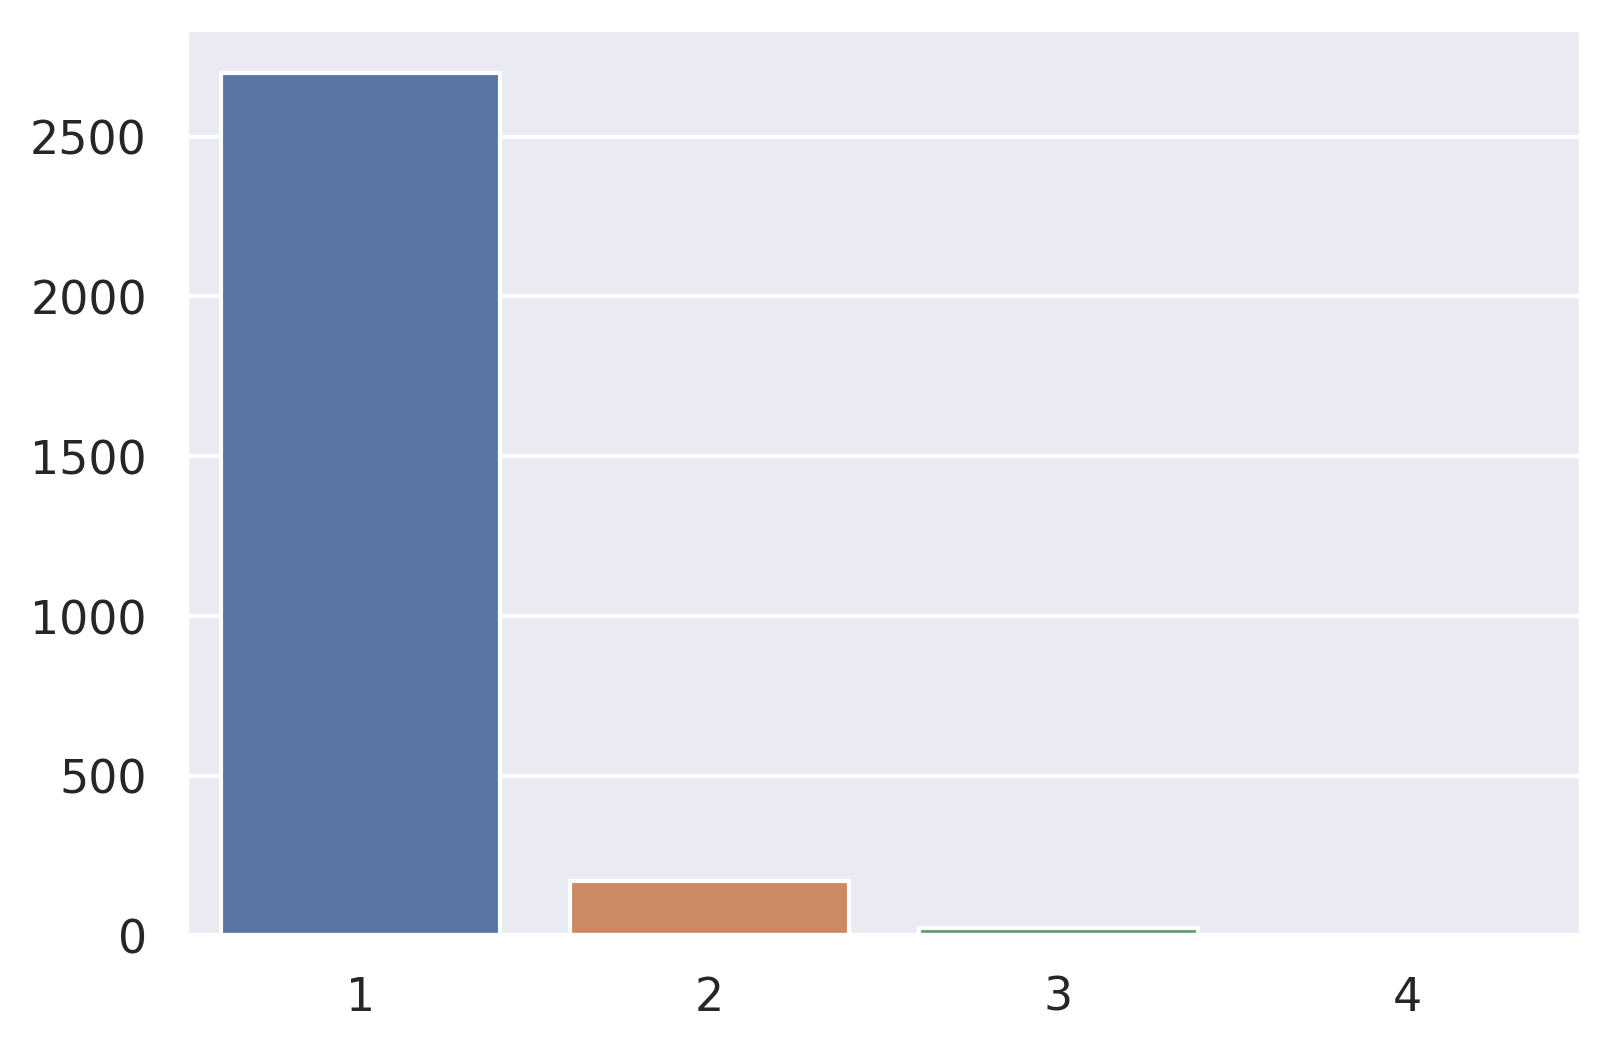

In [275]:
# number of stars 
temp_df = df['num_star'].value_counts()
x = np.linspace(1, temp_df.nunique(), temp_df.nunique(), dtype=int)
y = temp_df.to_list()
sns.barplot(x=x, y=y)

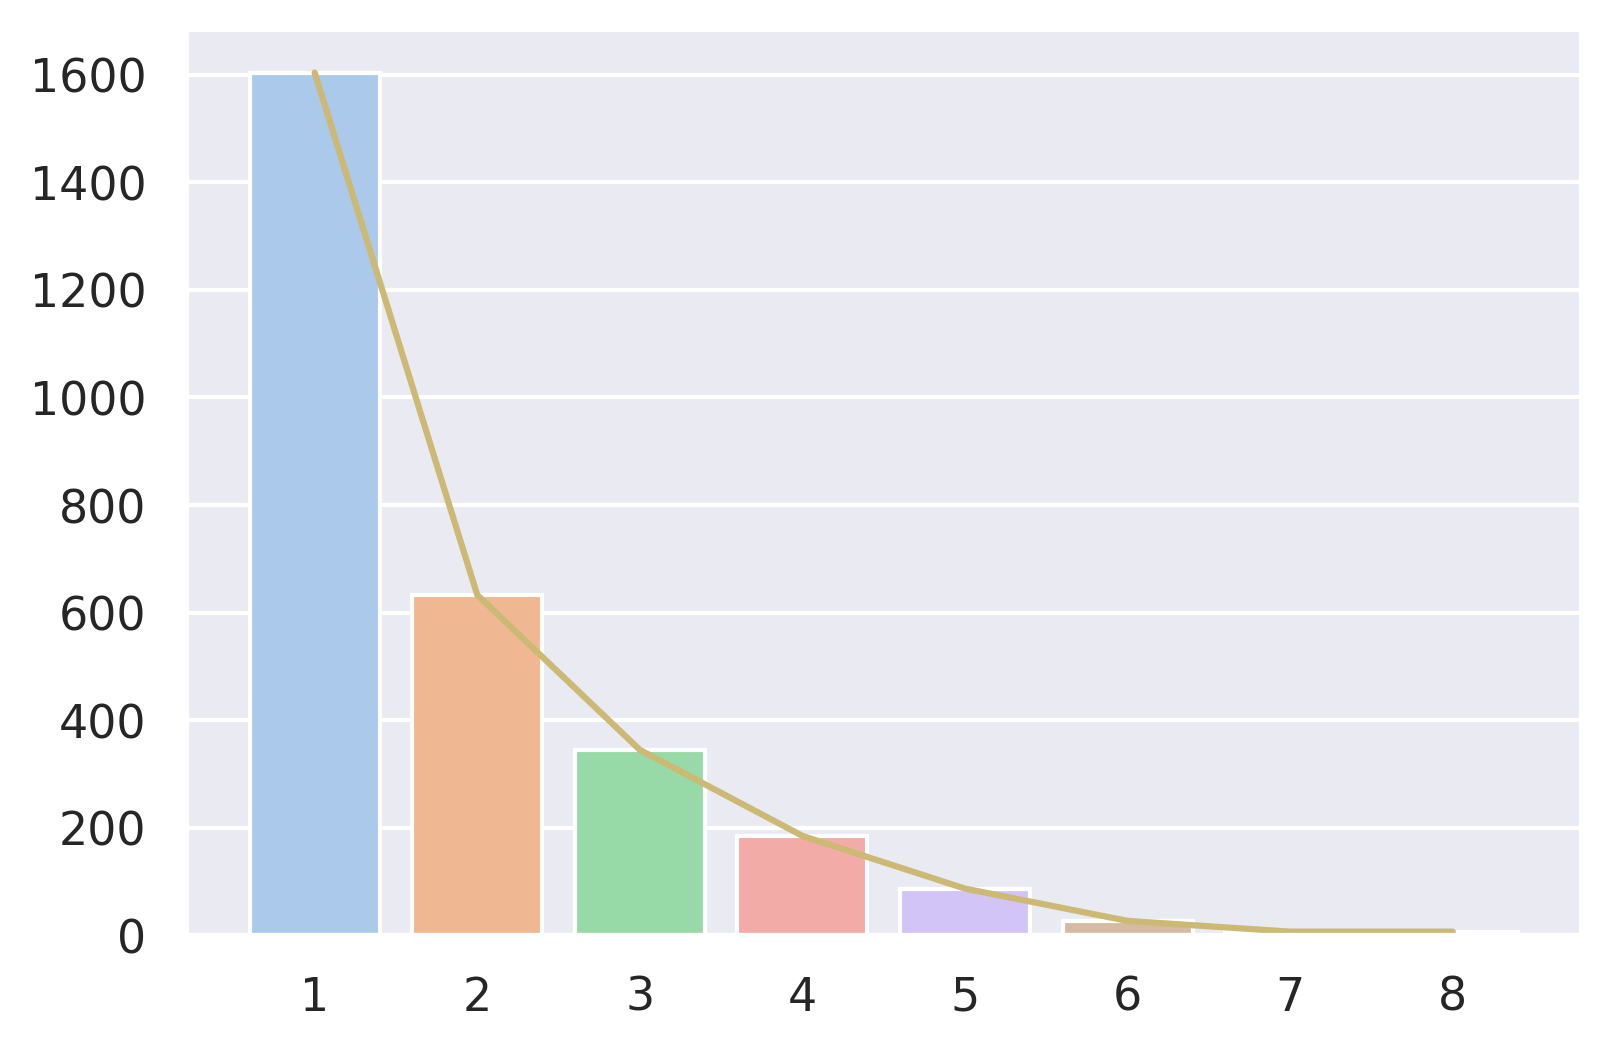

In [285]:
# number of num_planets 
temp_df = df['num_planet'].value_counts()
x = np.linspace(1, temp_df.nunique()+1, temp_df.nunique()+1, dtype=int)
y = temp_df.to_list()
sns.barplot(x=x, y=y, palette='pastel')
sns.lineplot(x=x-1, y=y, color='y')
# sns.distplot(df['num_planet'])

2891    1
4       1
Name: 2_stars, dtype: int64


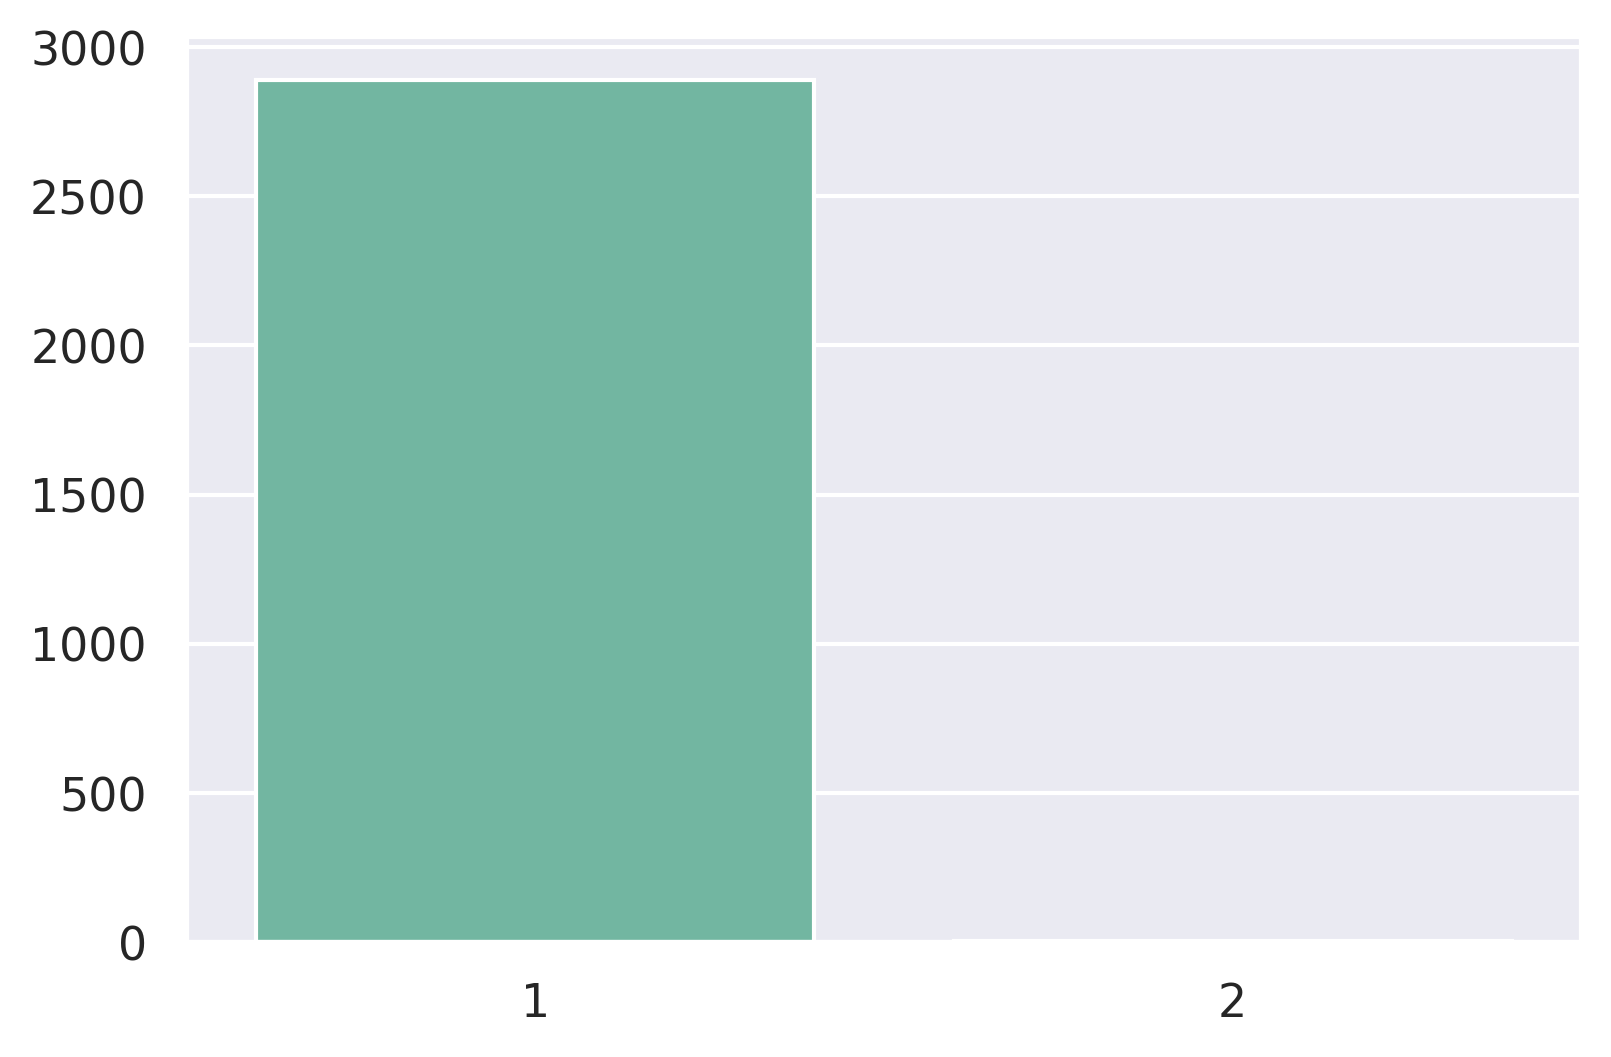

In [277]:
# convert to log transformation. 2 stars has only 4 entries
temp_df = df['2_stars'].value_counts()
x = np.linspace(1, temp_df.nunique(), temp_df.nunique(), dtype=int)
y = temp_df.to_list()
sns.barplot(x=x, y=y, palette='Set2')
print(temp_df.value_counts())

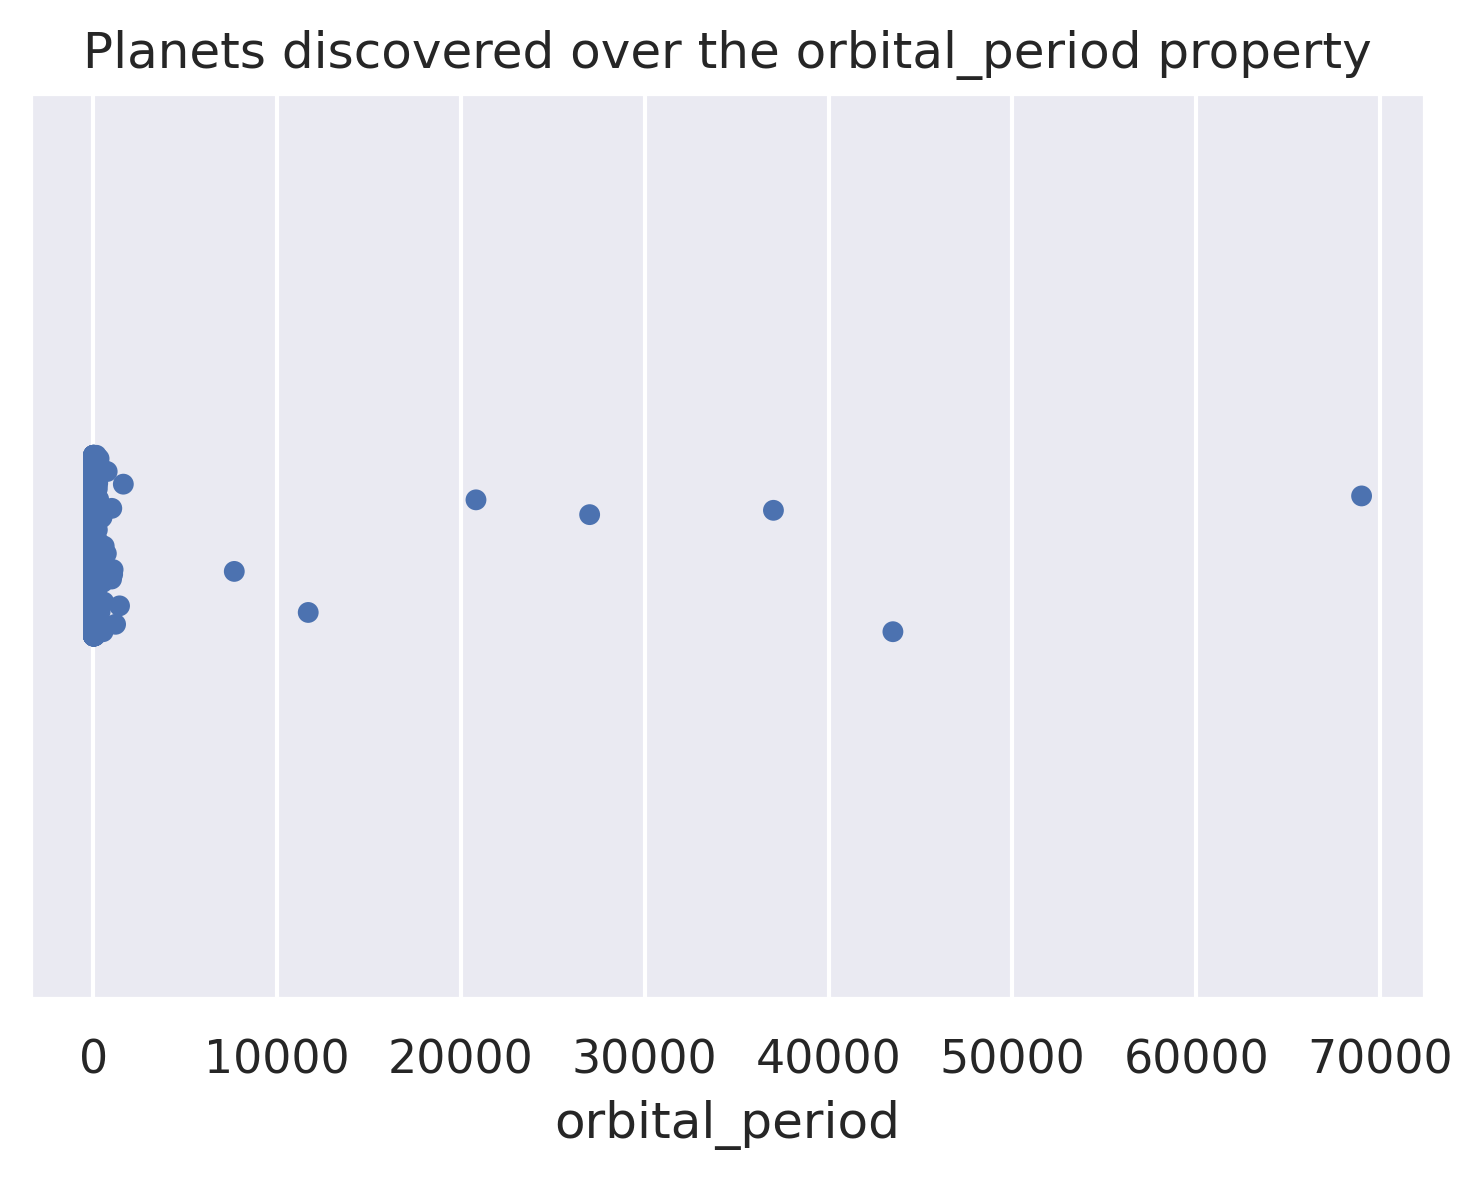

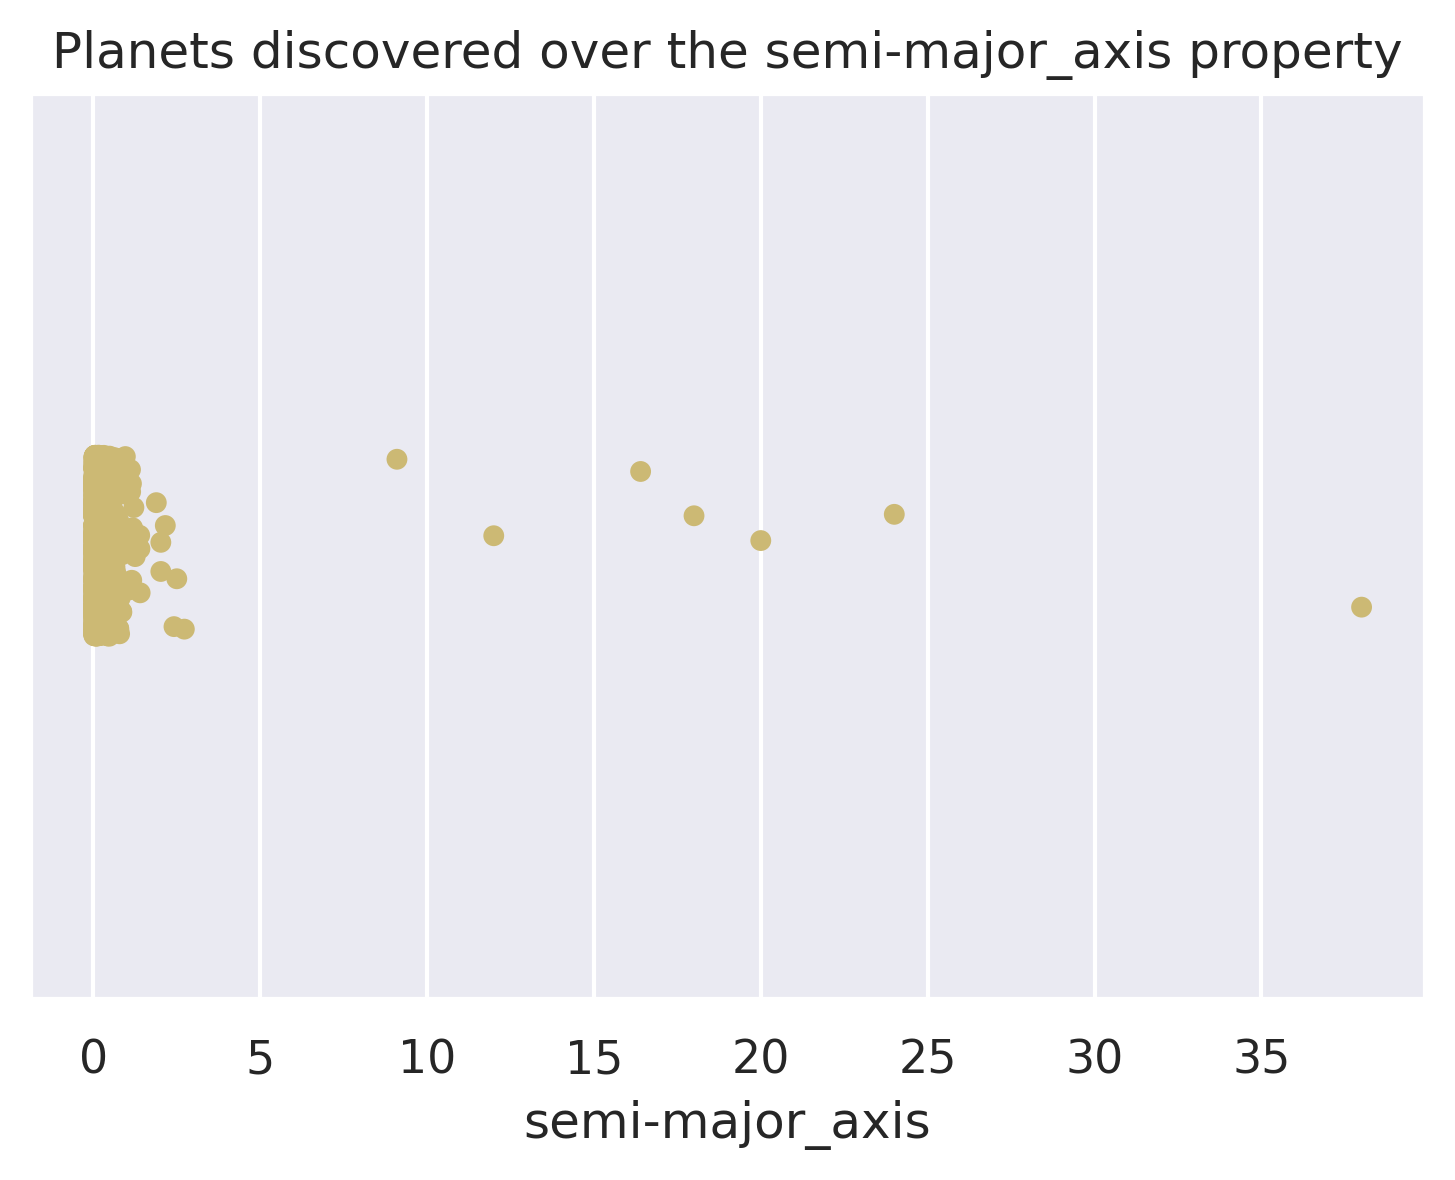

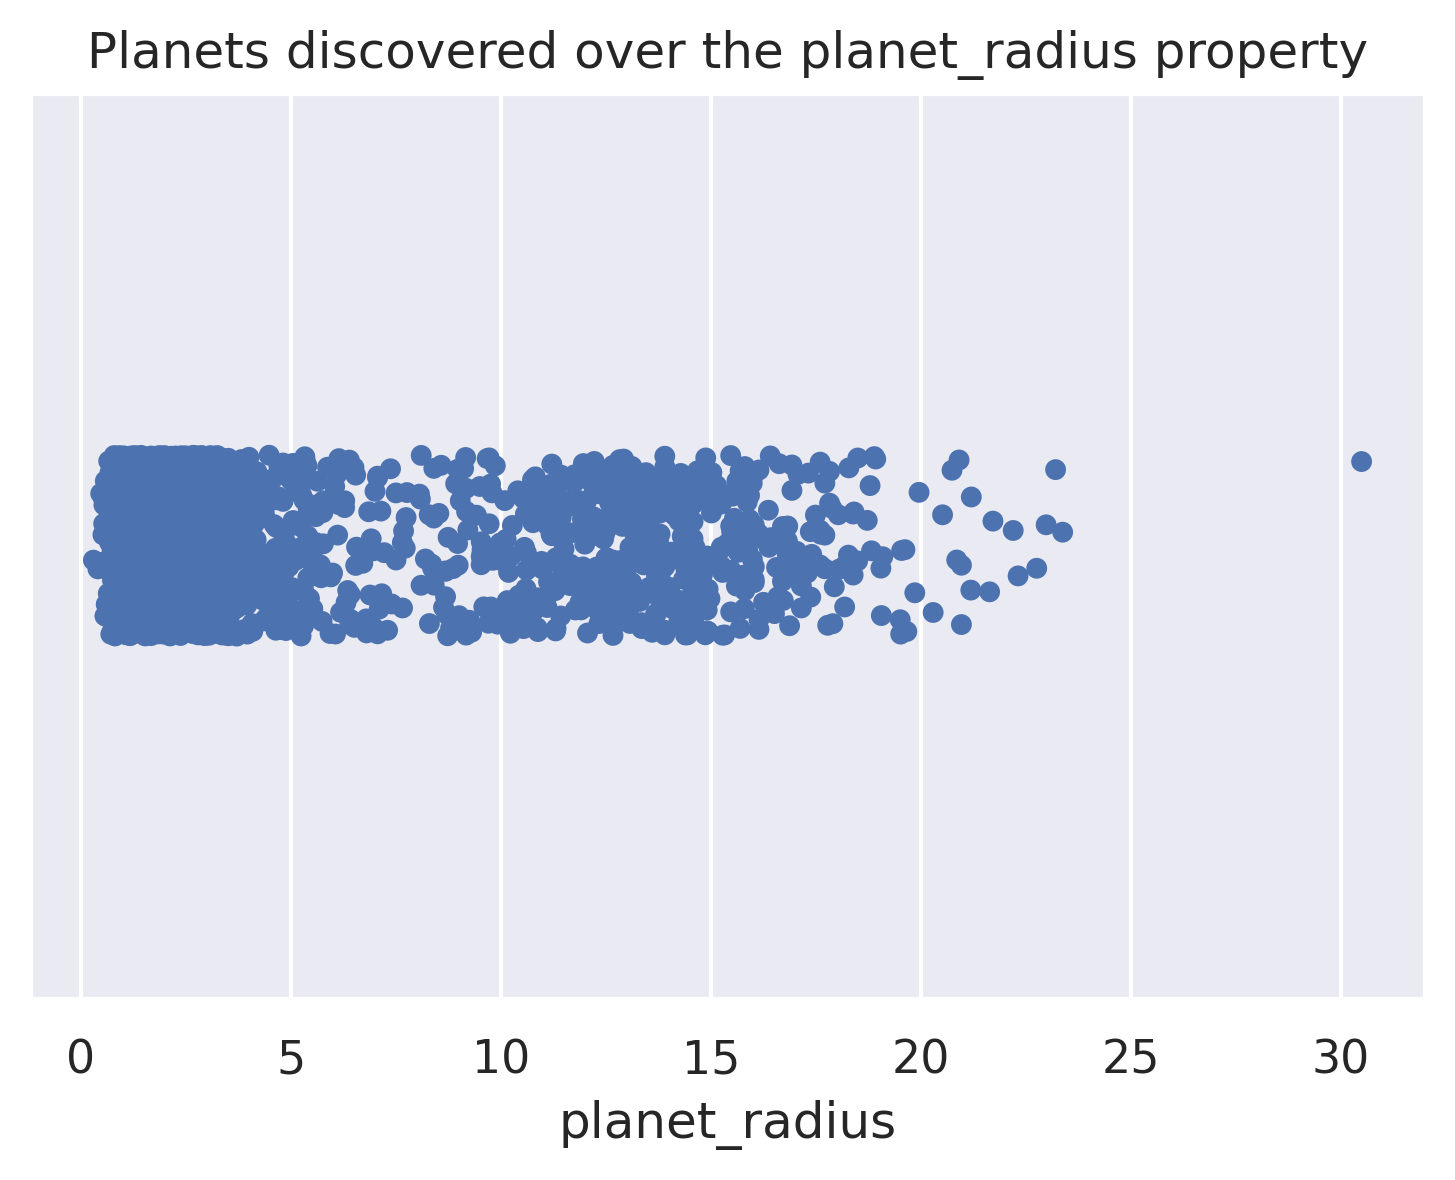

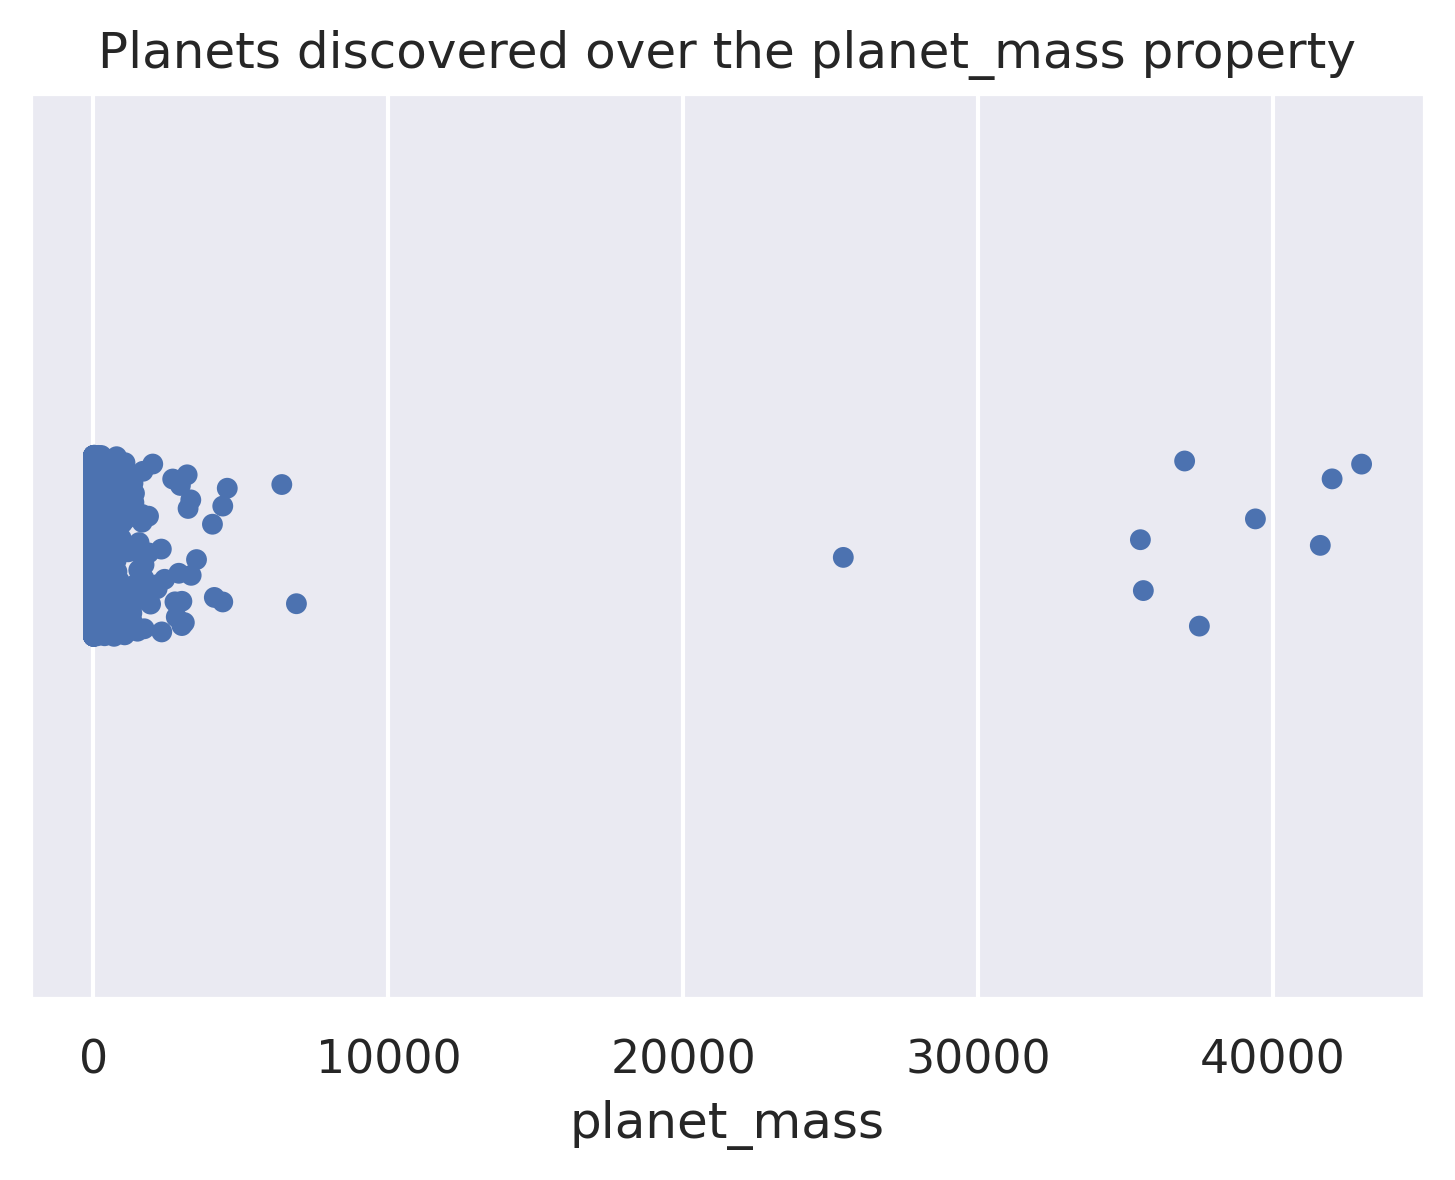

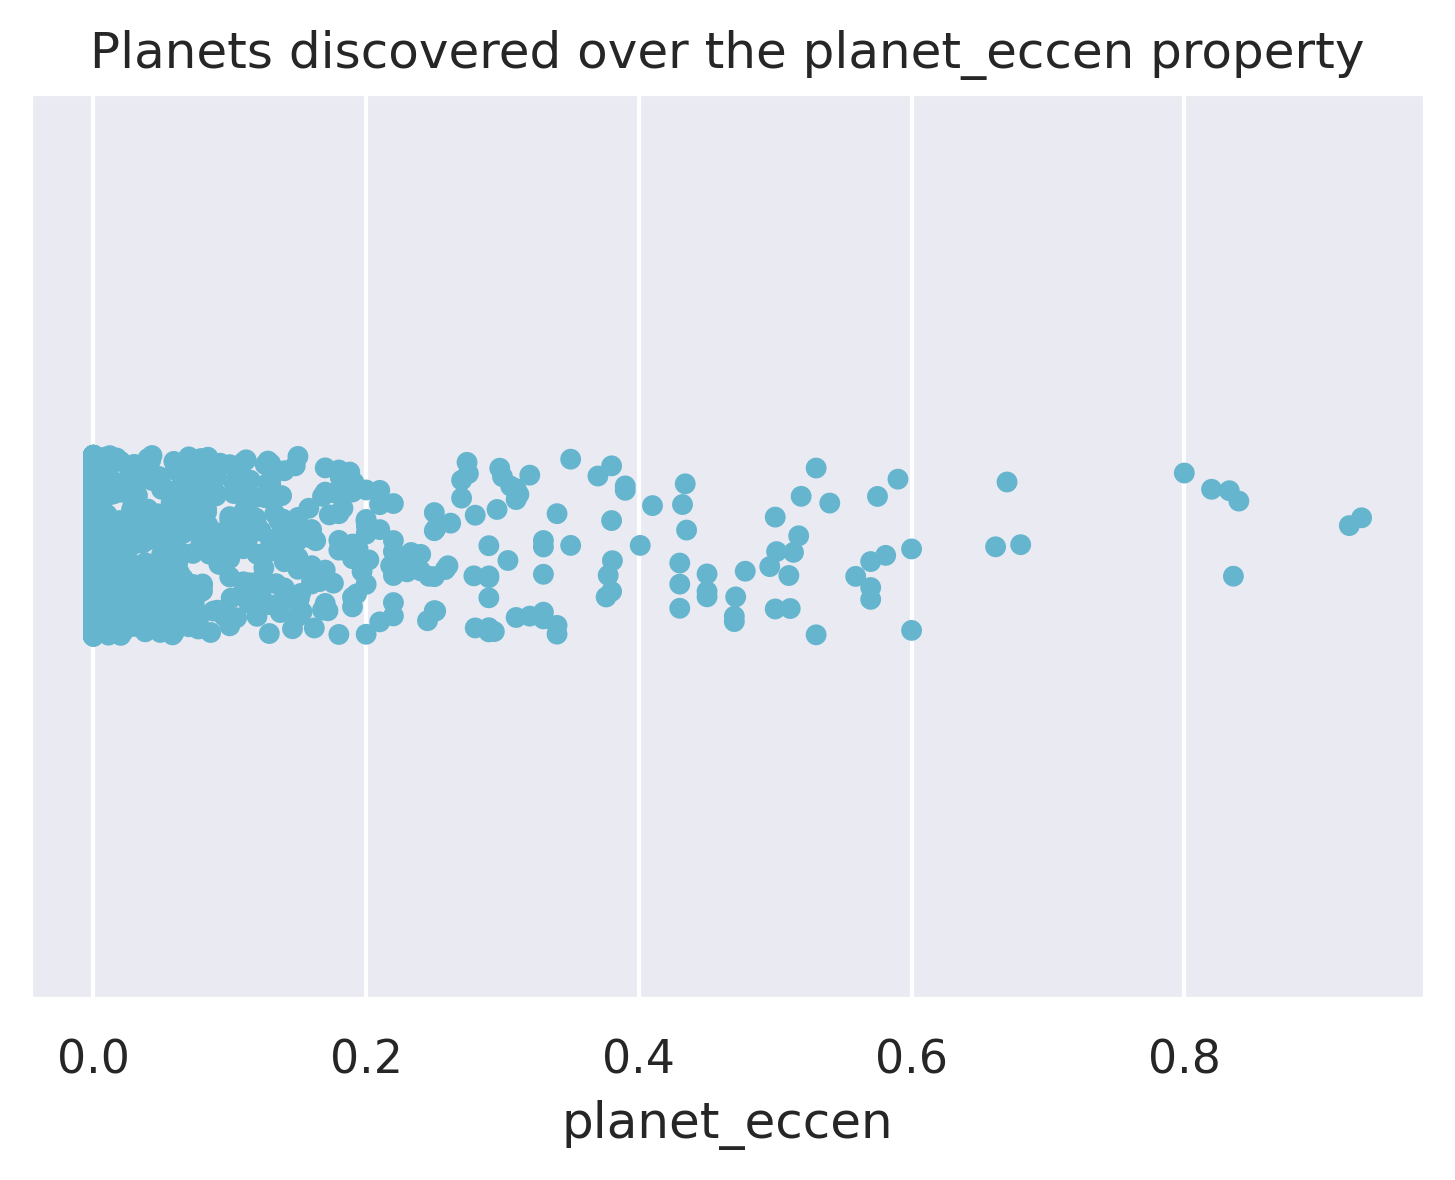

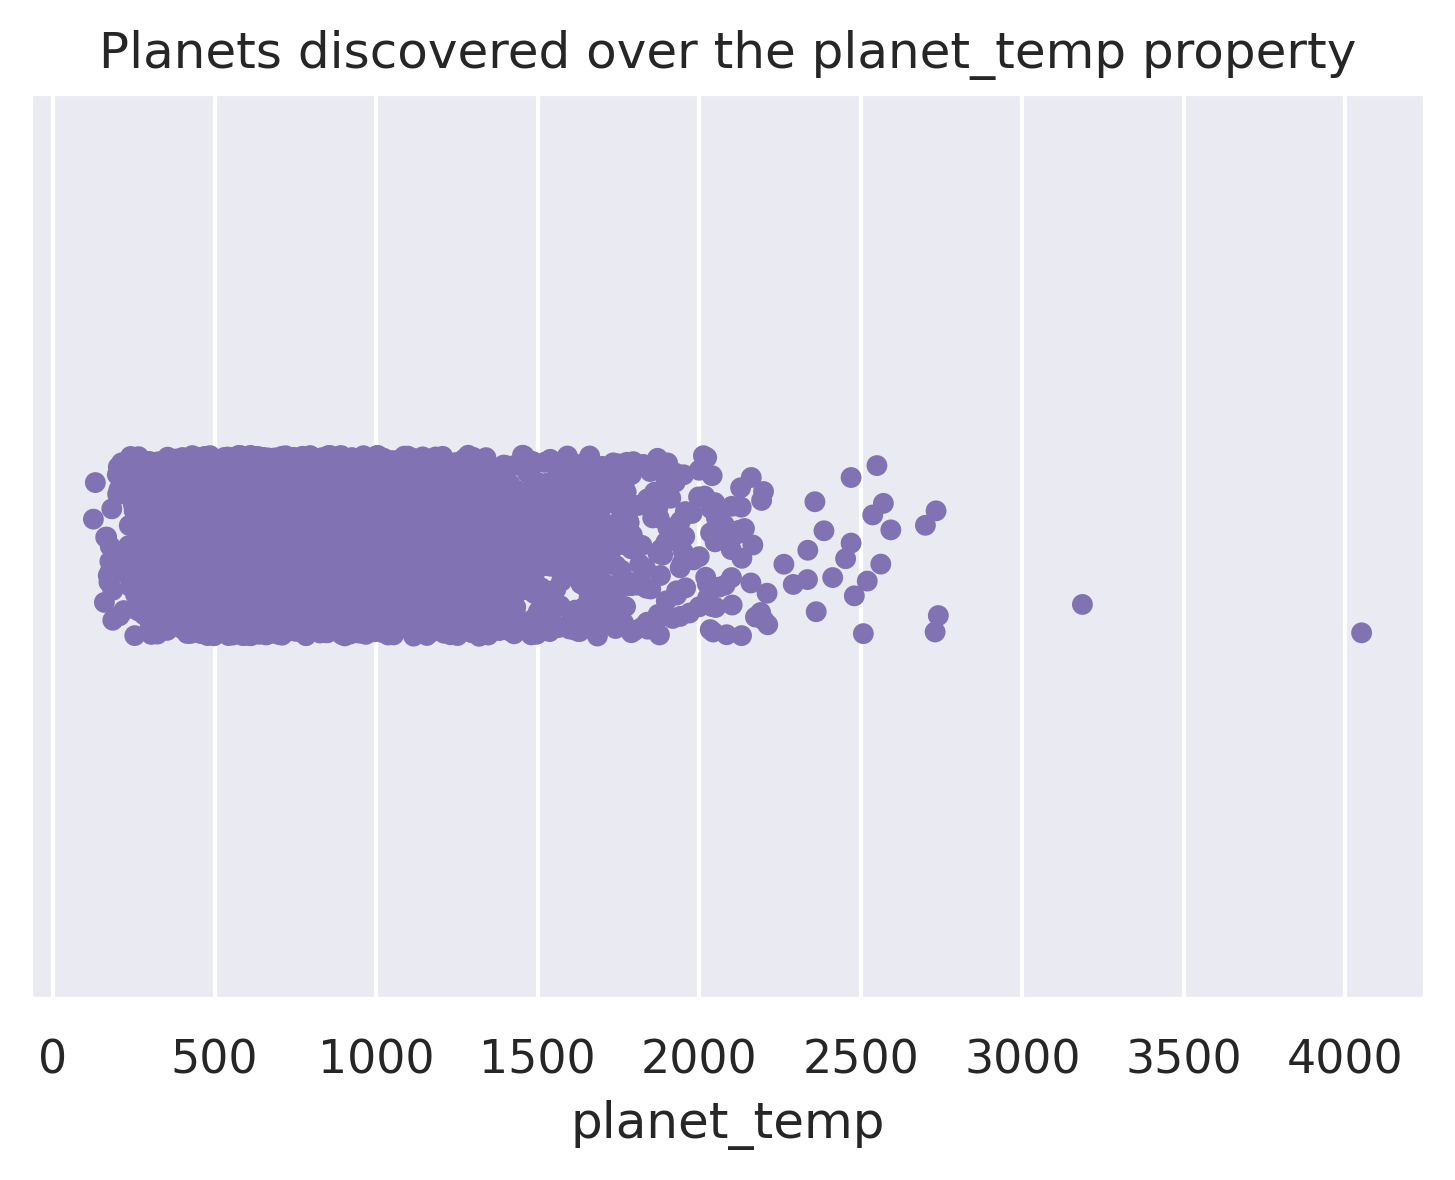

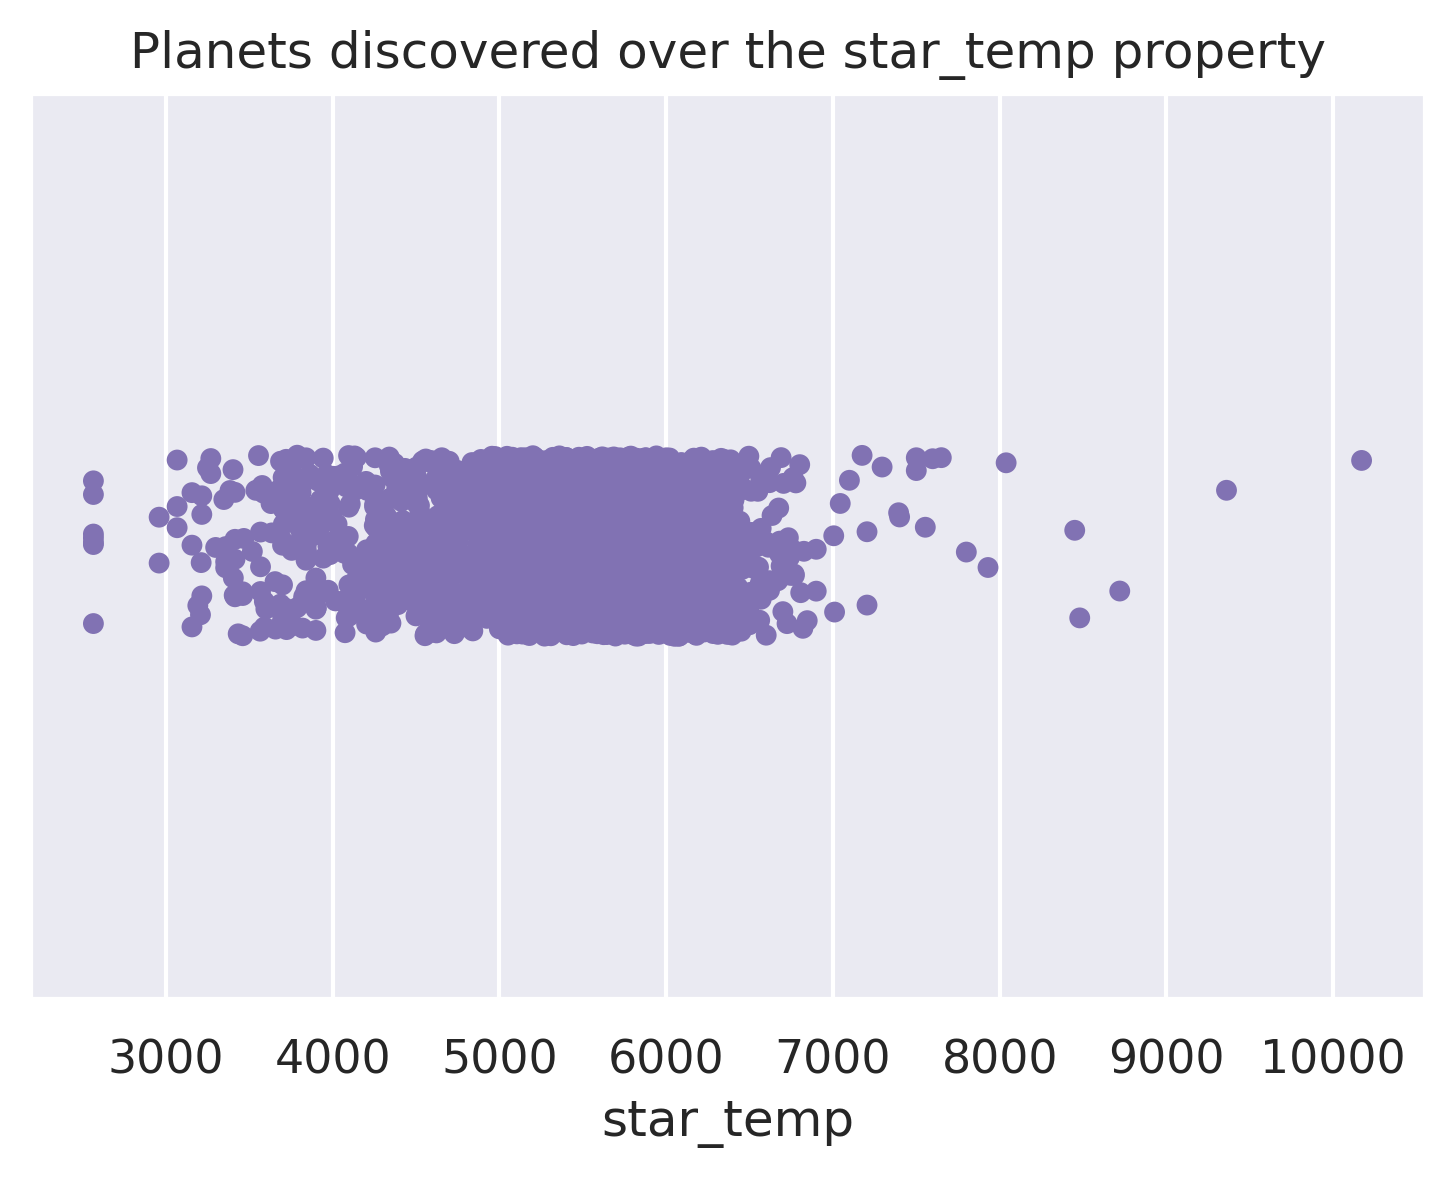

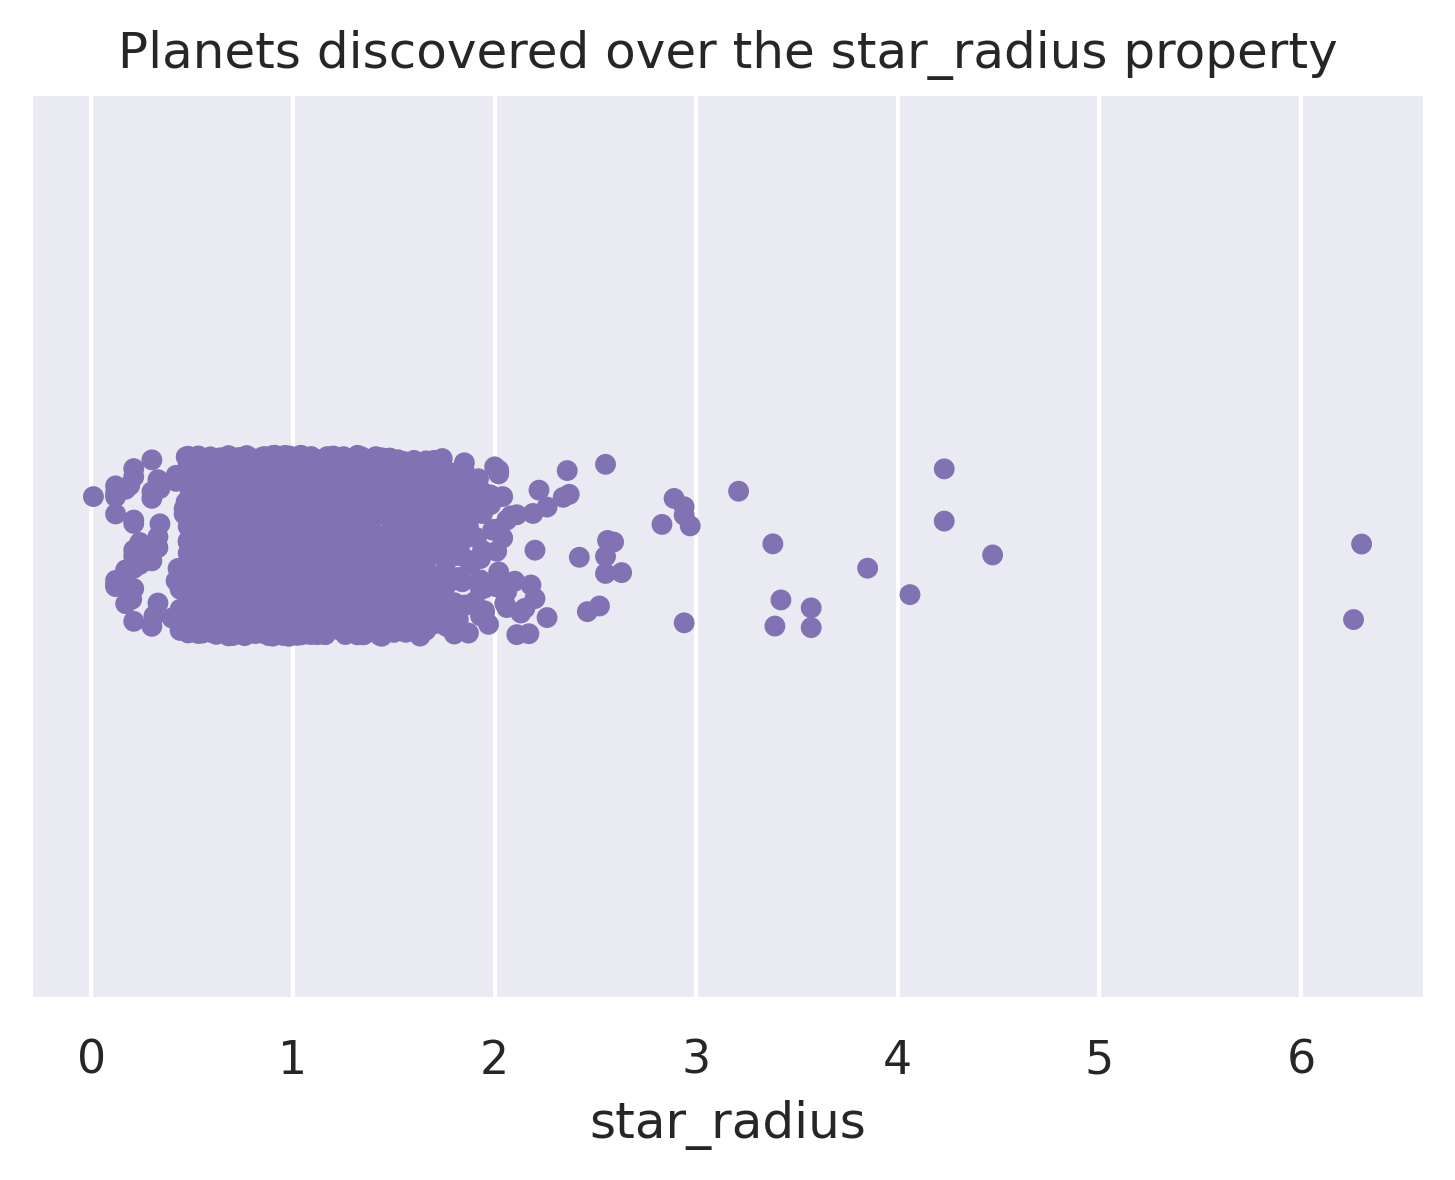

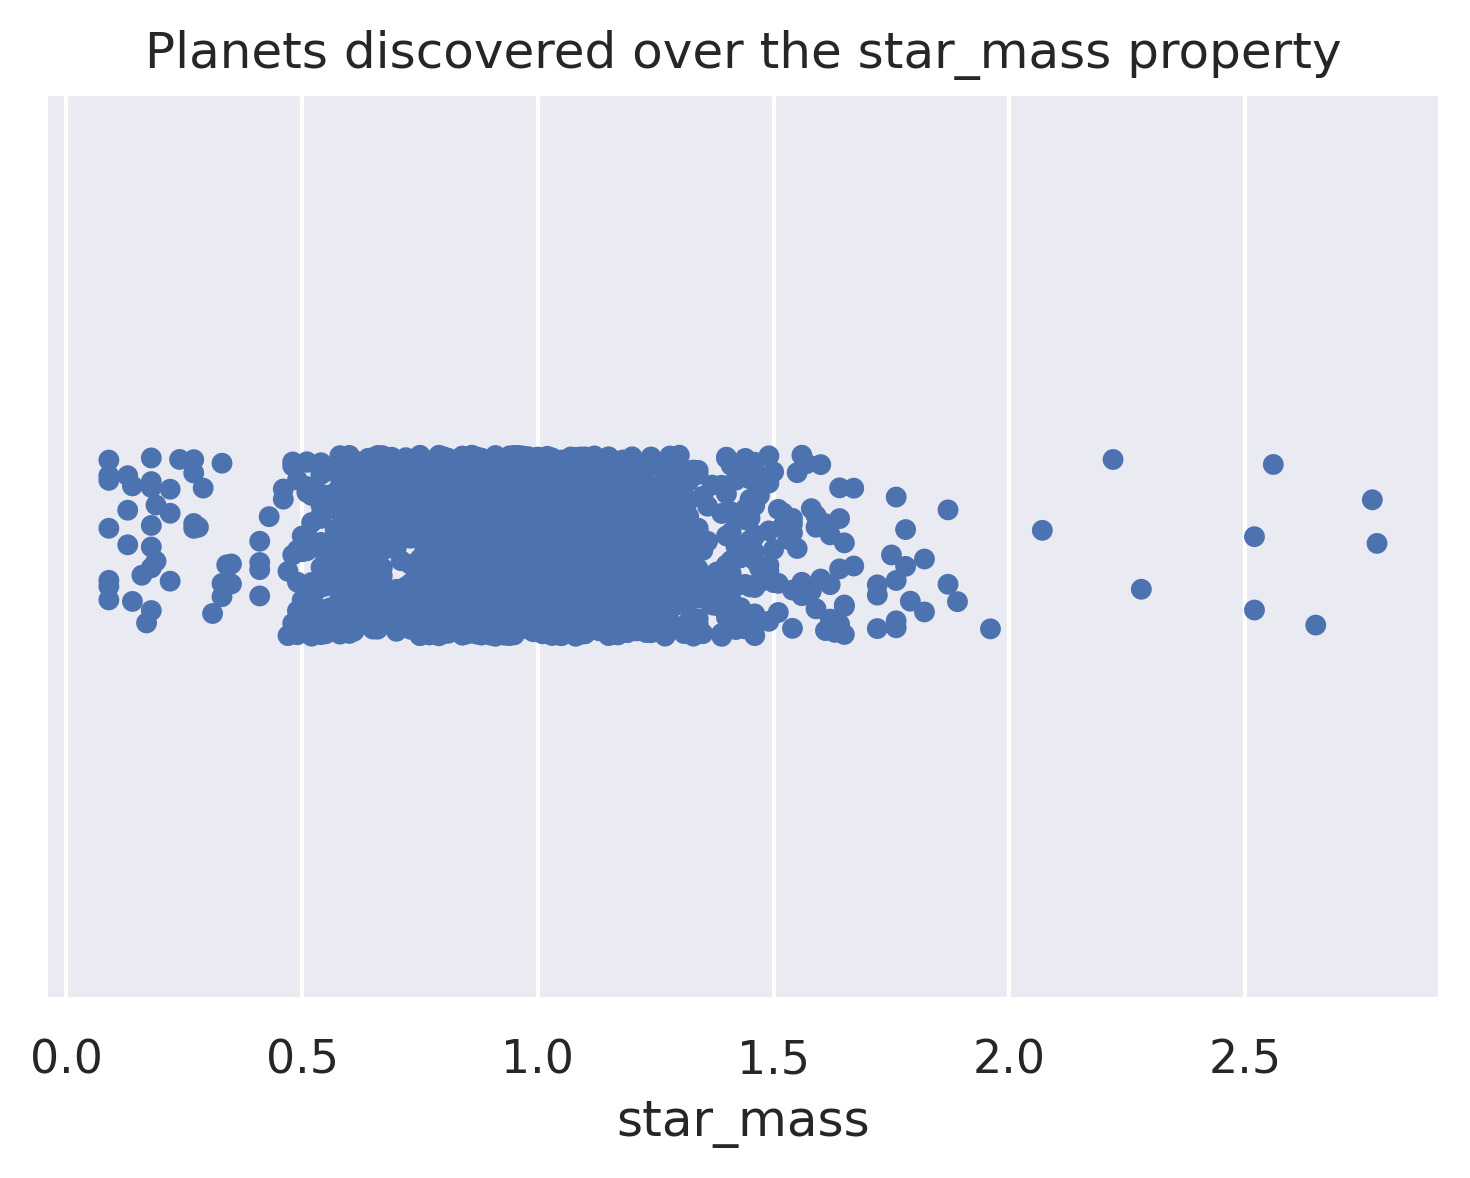

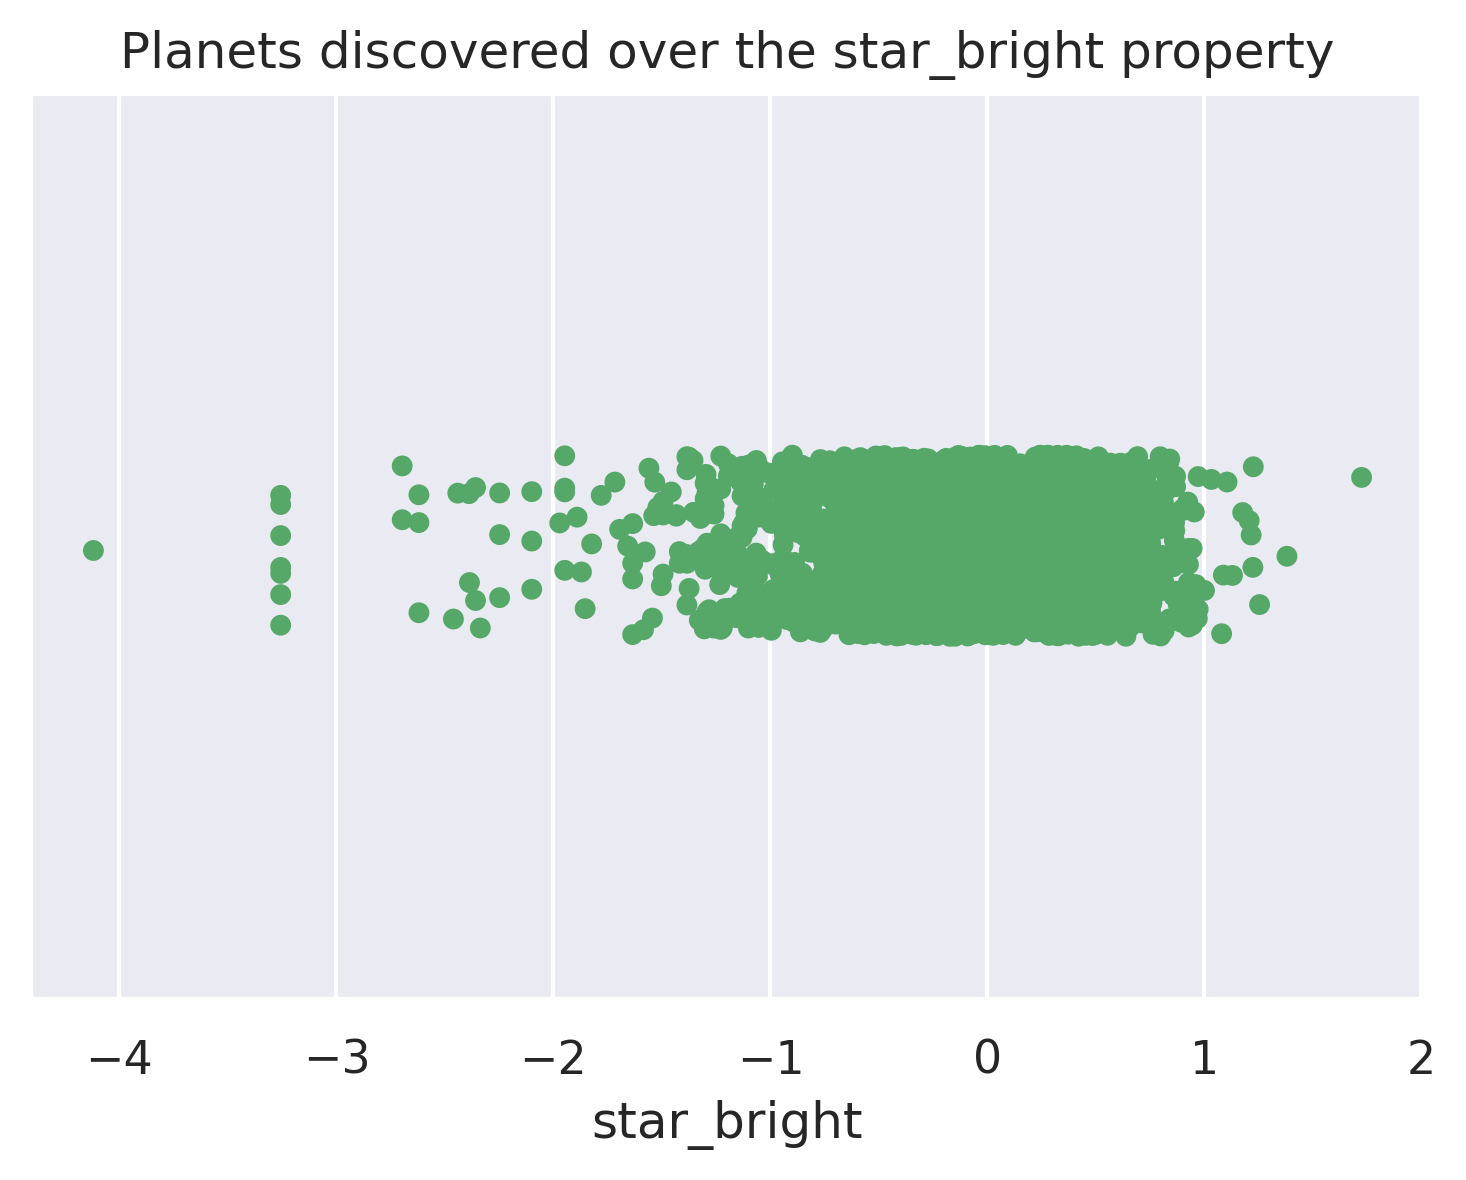

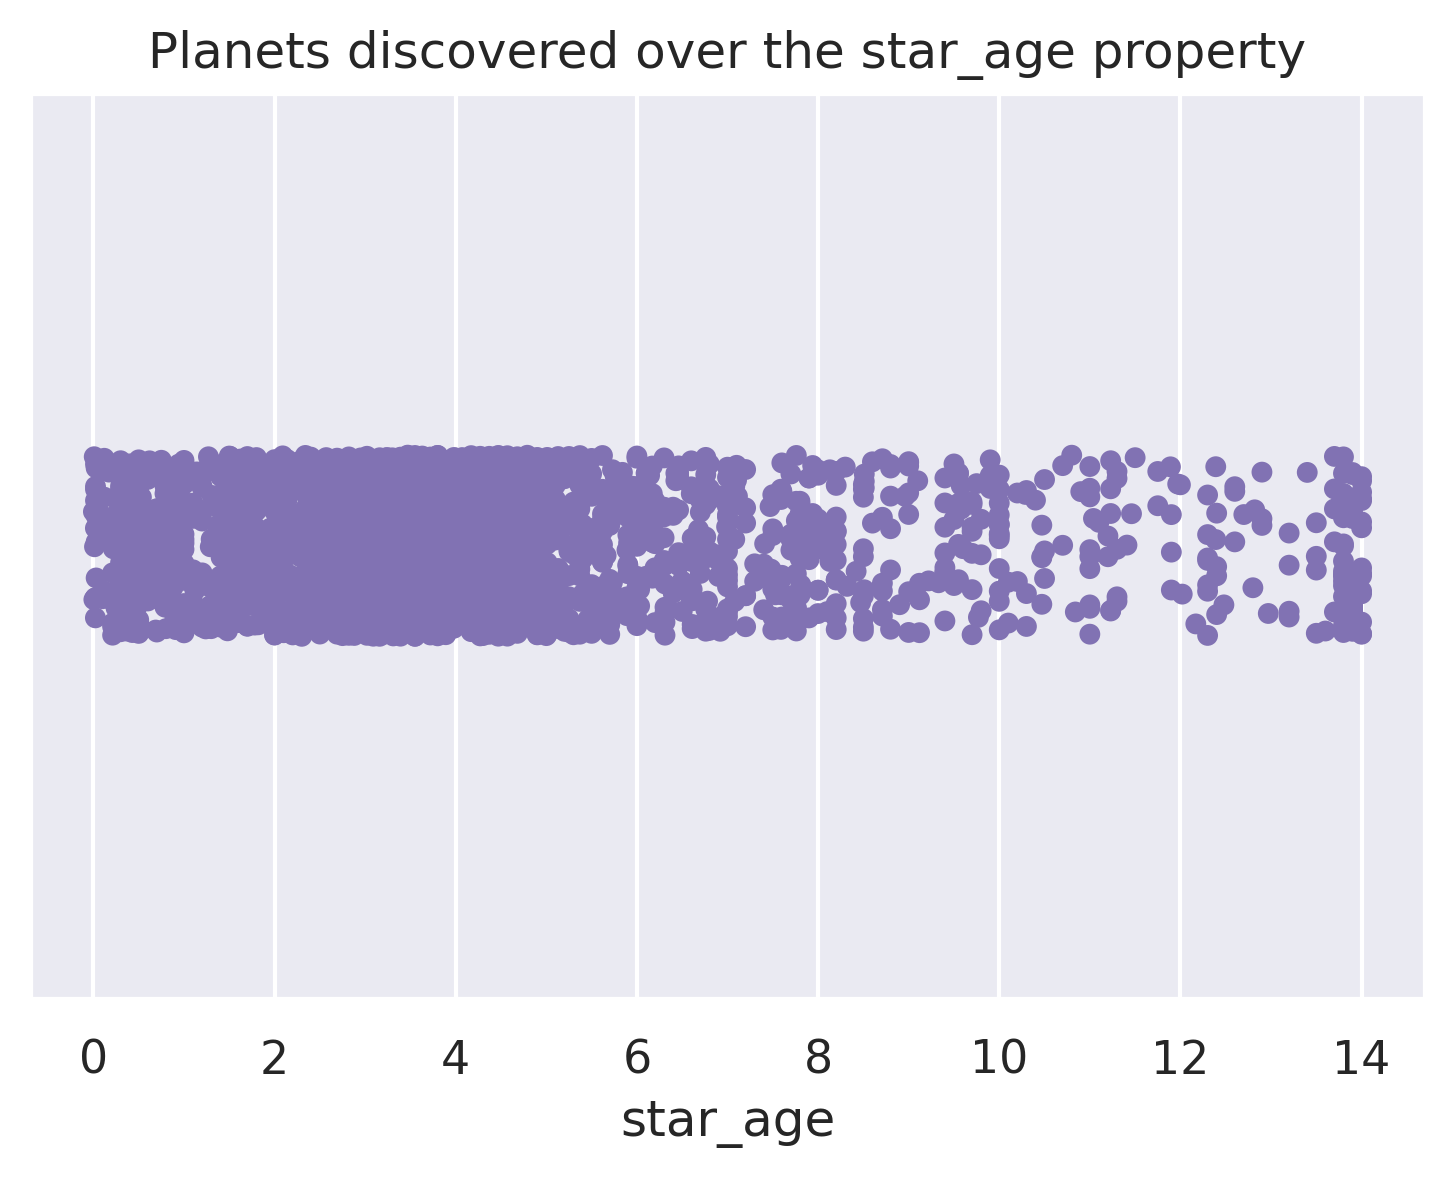

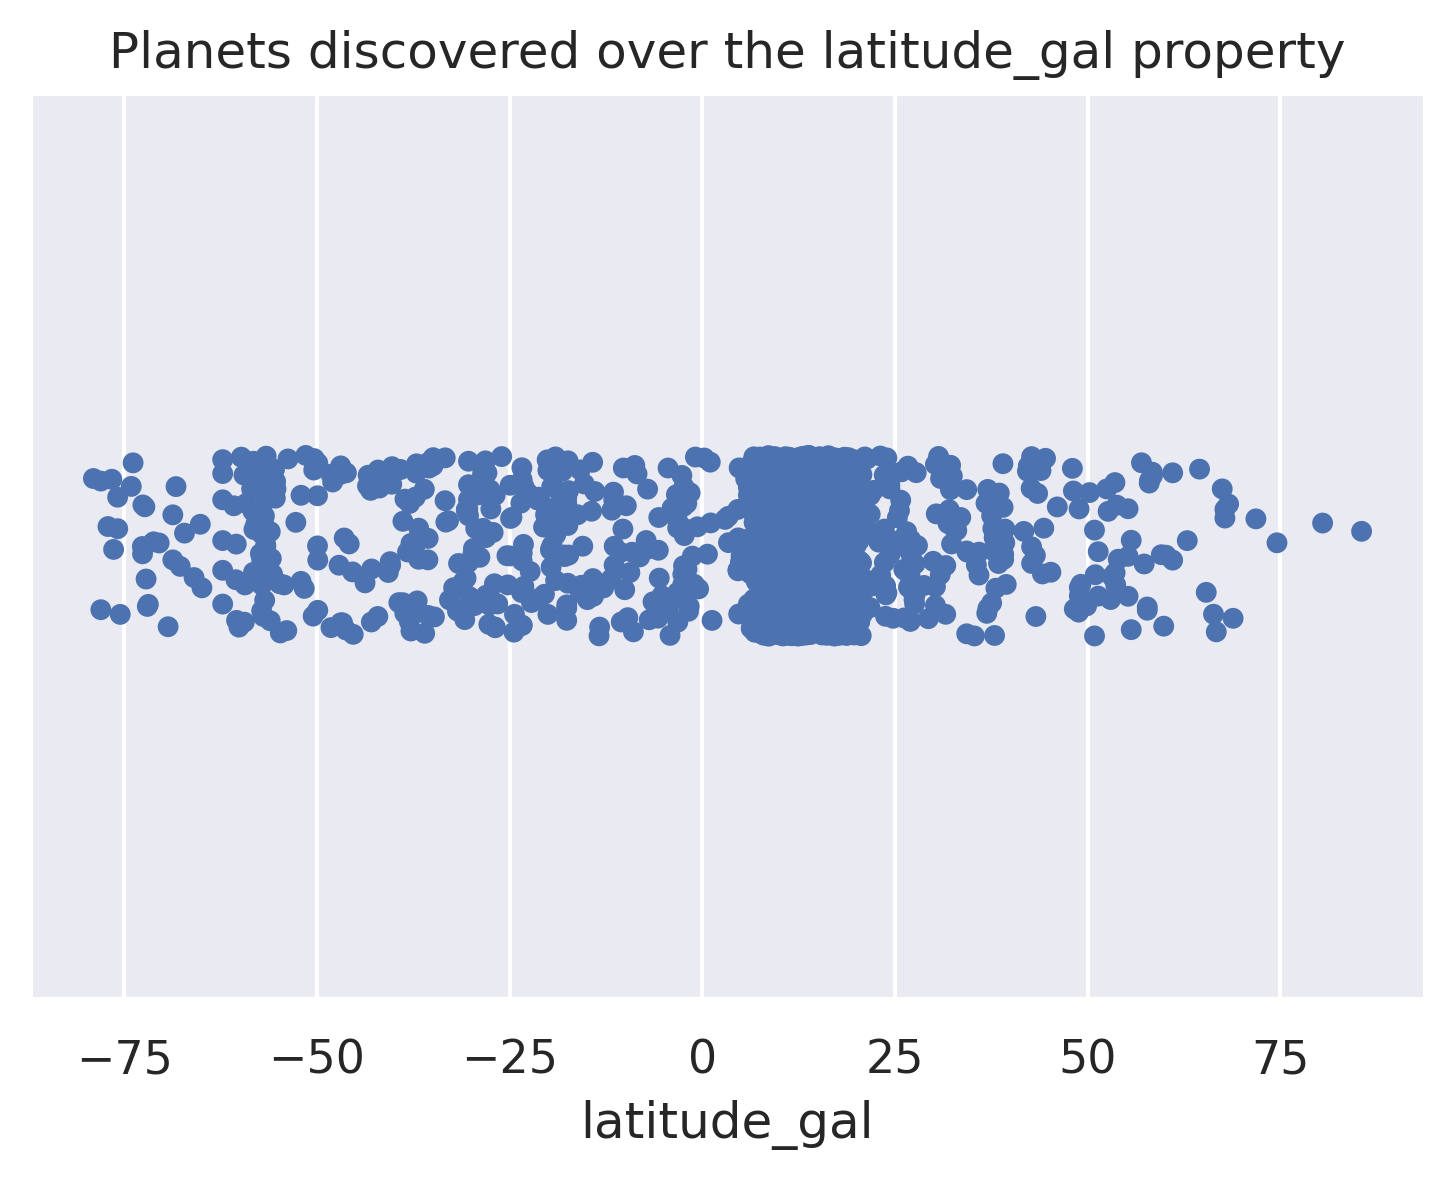

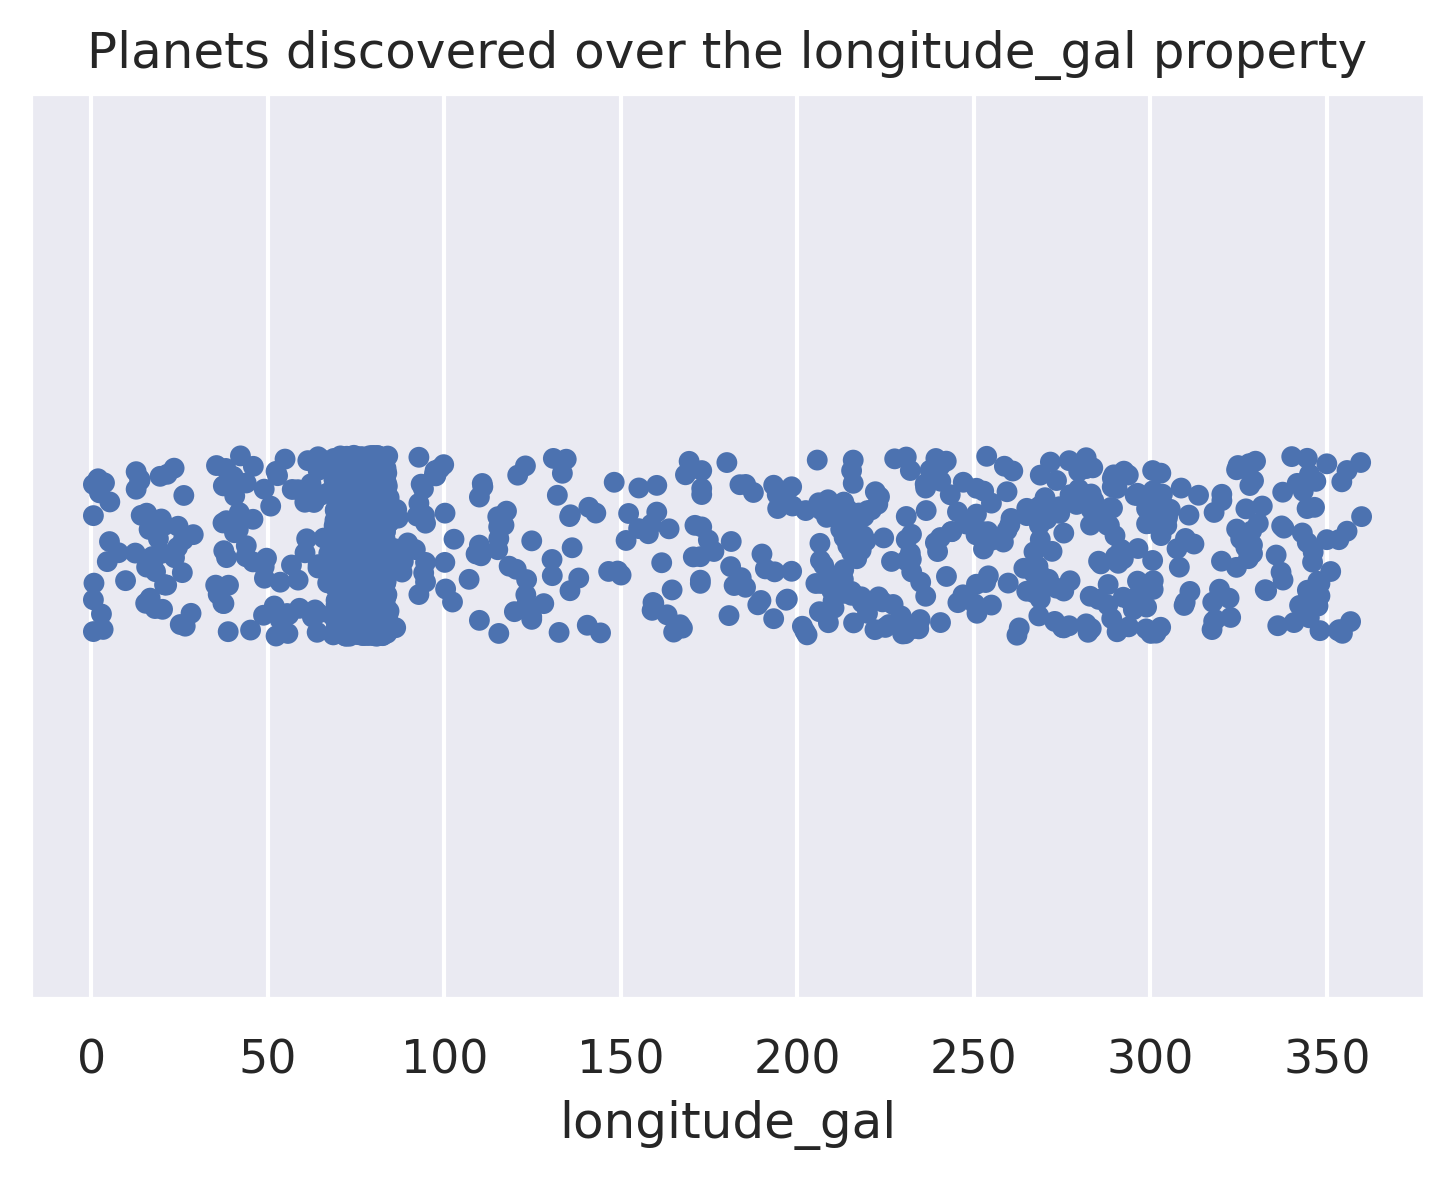

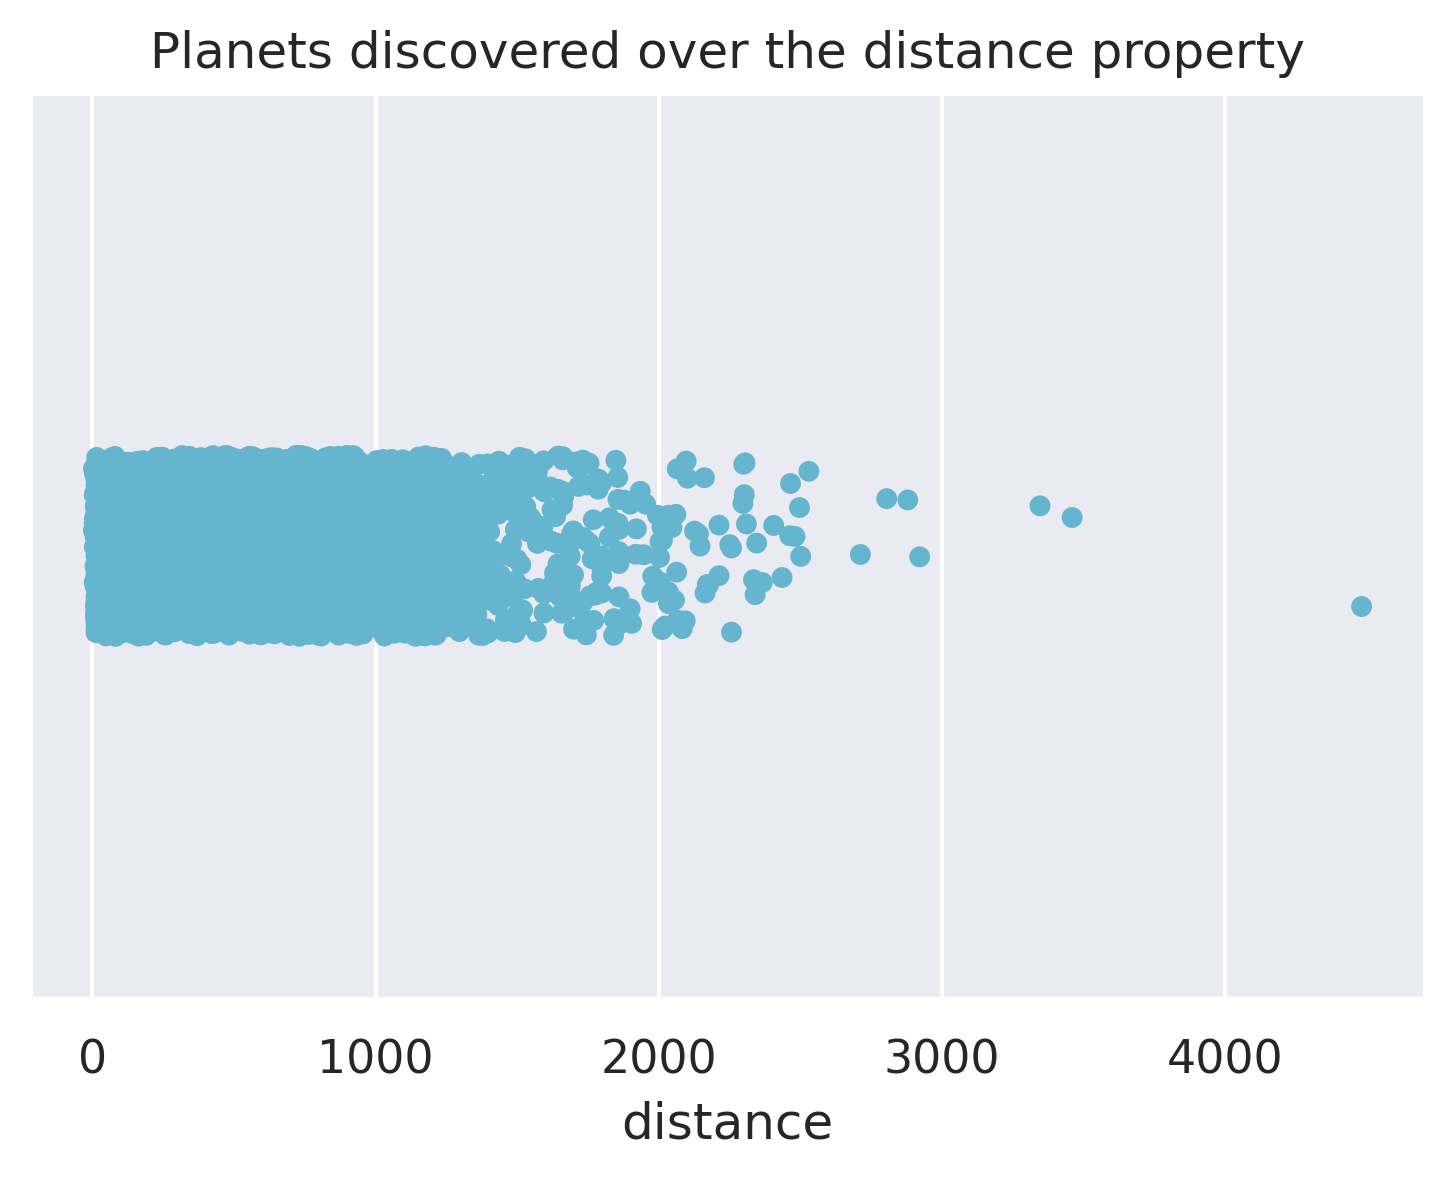

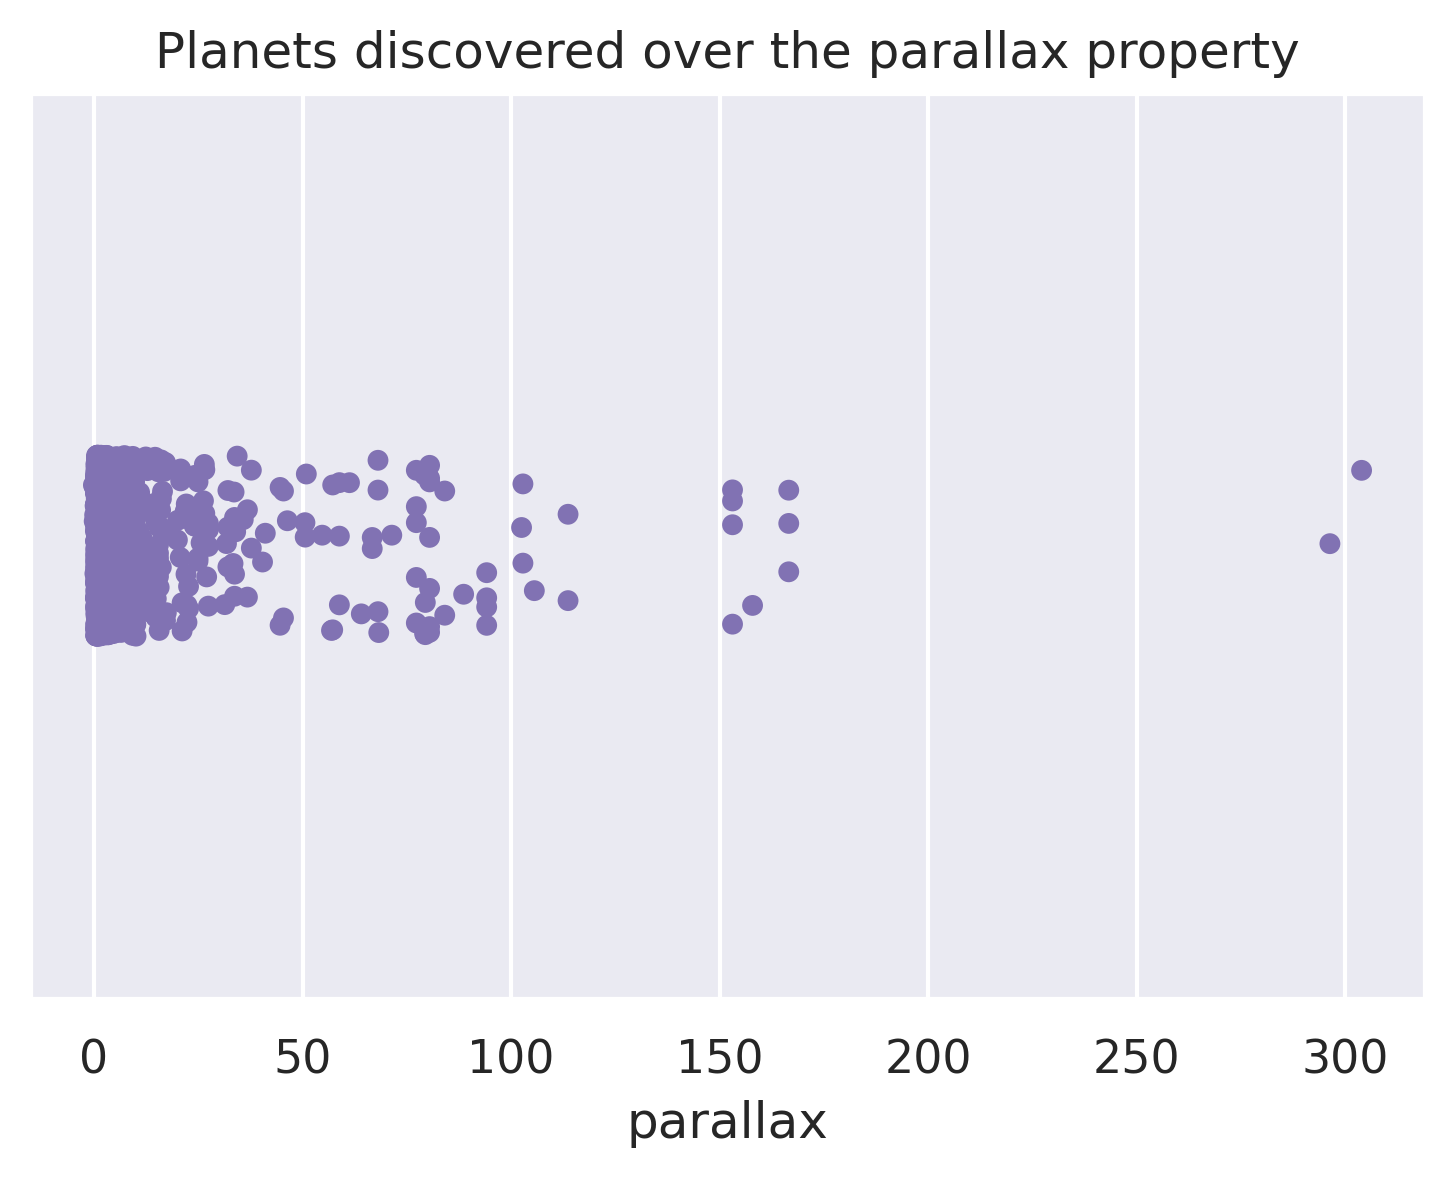

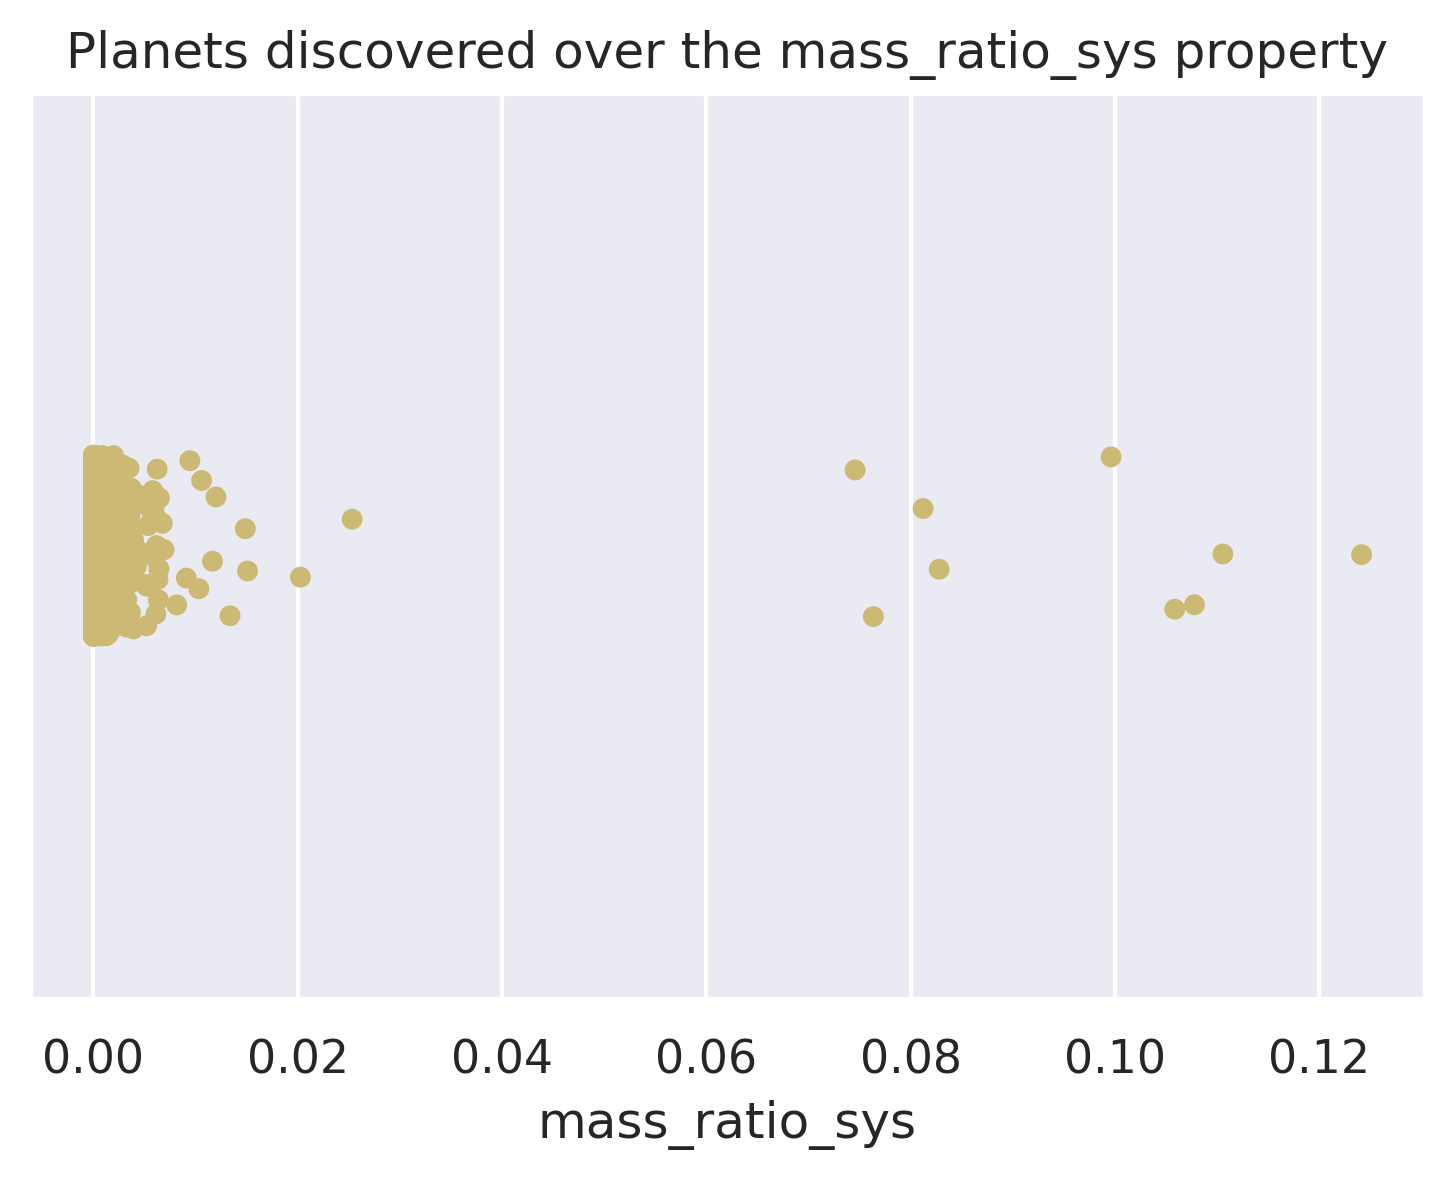

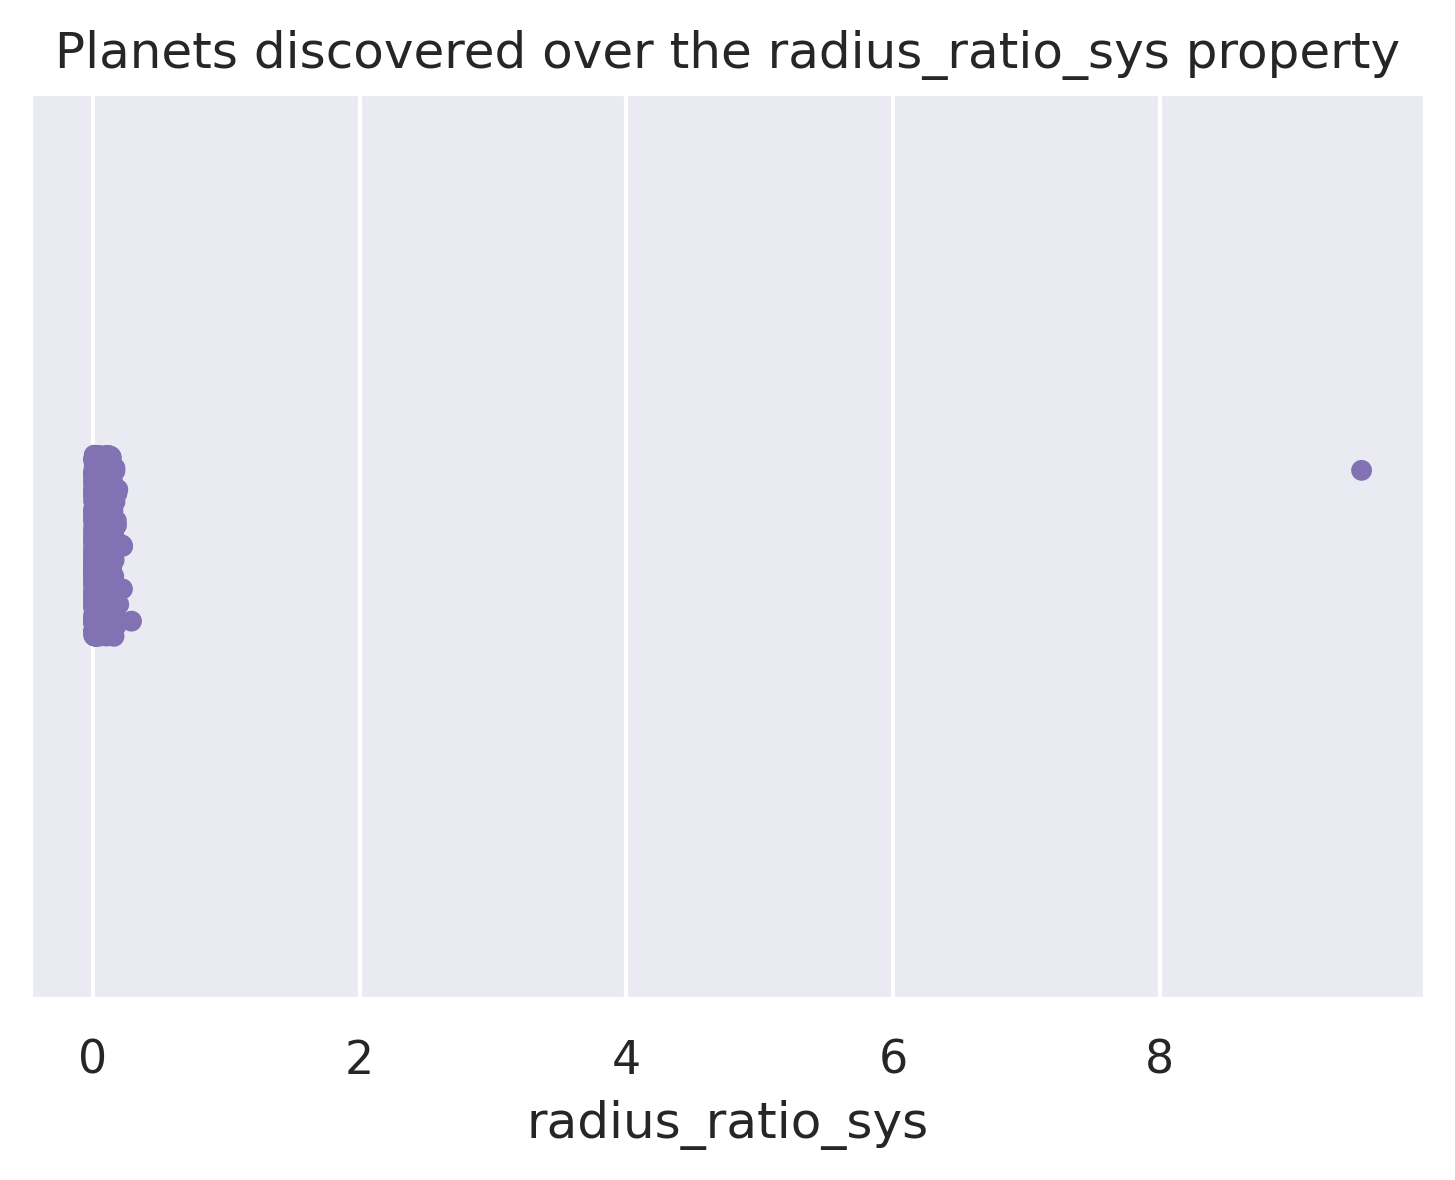

In [294]:
"""
The following code will take care of the other columns.
I have done them all in a for loop cause they all use single variable 
scatterplots (thts the best way to represent them).
We can selectivley choose later.
"""
from random import choice

excluded = [
            'num_star',
            'num_planet',
            '2_stars',
]
colors = [
            'b', 'g', 'r', 
            'c', 'm', 'y',
            'b',
]
for column in df.columns:
    if column not in excluded:
        sns.stripplot(x=df[column], color=choice(colors))
        plt.title(f'Planets discovered over the {column} property')
        plt.show()


### **2 Variable Graphs**

<function matplotlib.pyplot.show>

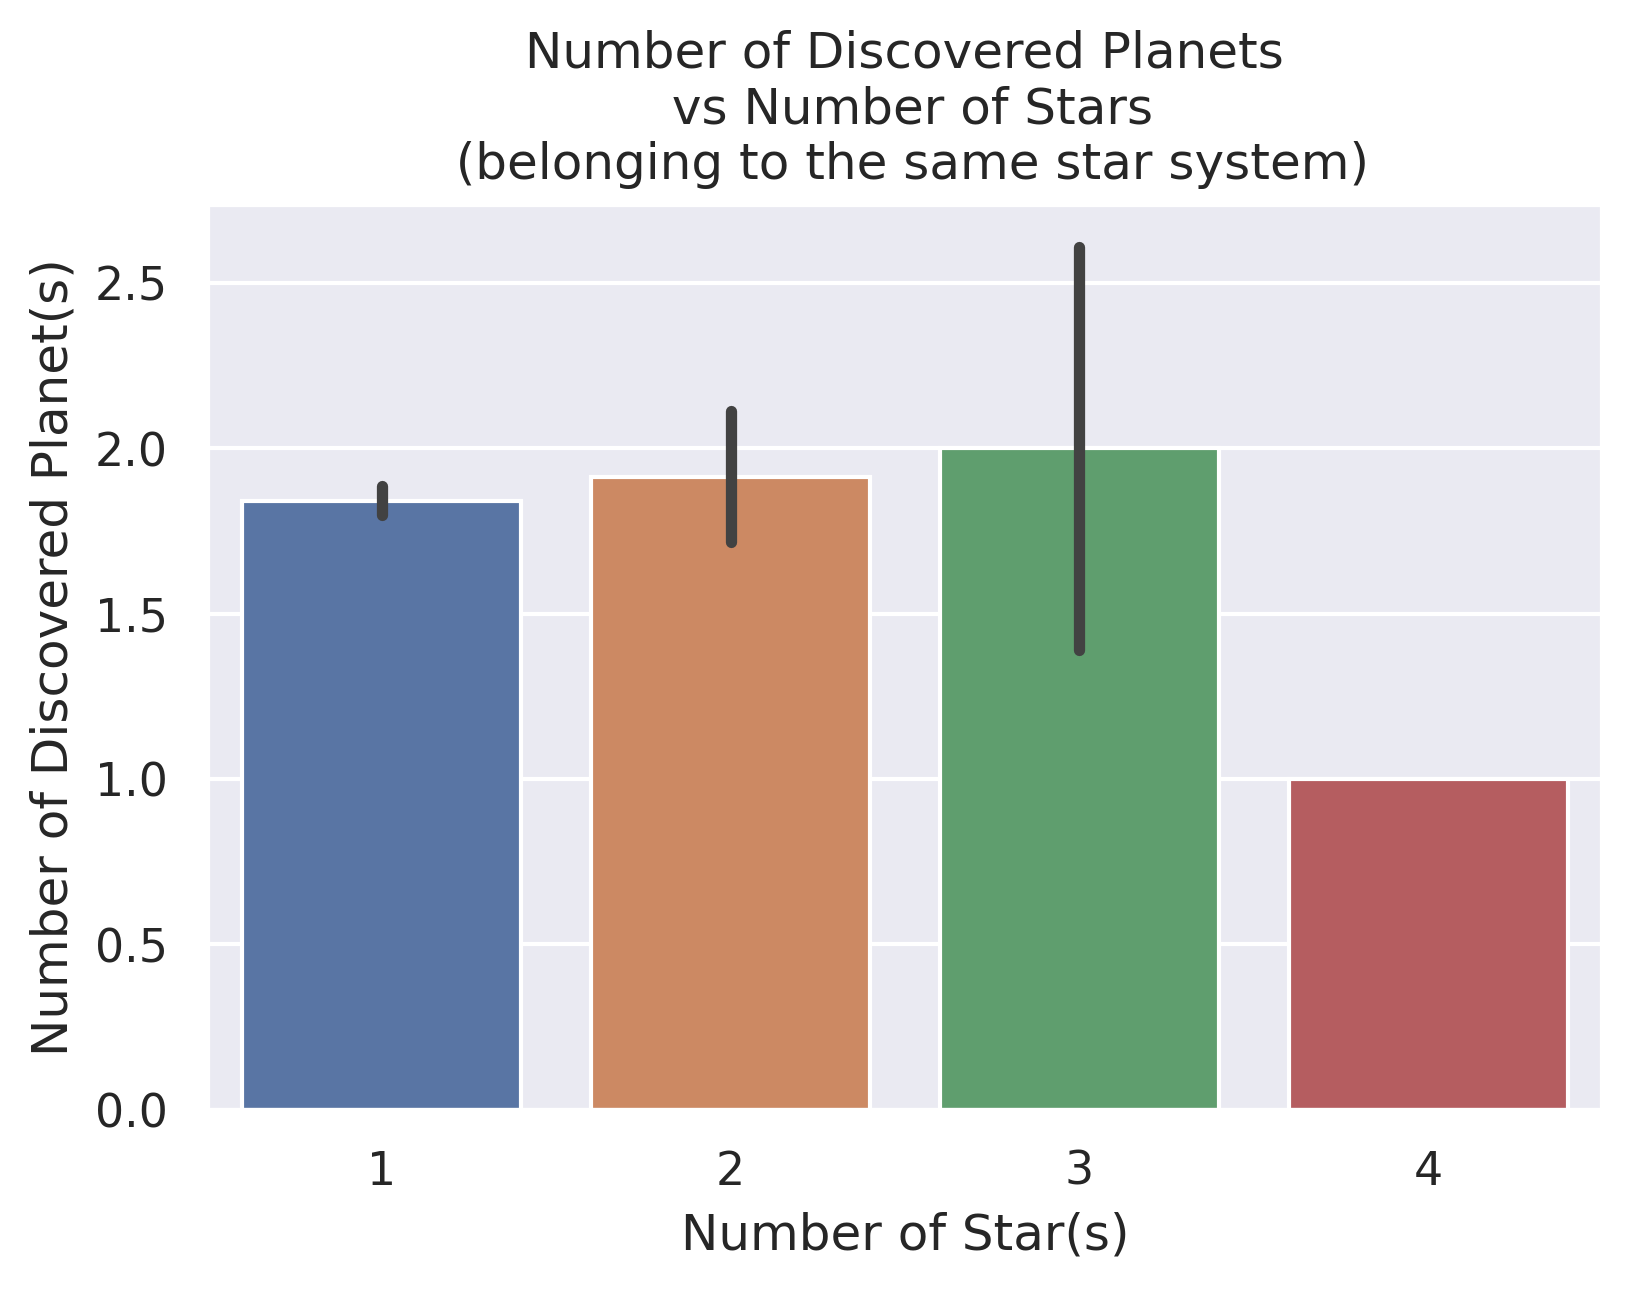

In [297]:
# sns.lmplot(x='num_star', y='num_planet', data=df)
# sns.distplot(df['num_star'])
# sns.displot(x='num_planet', data=df)
# sns.lineplot(x='num_planet', y='num_star', data=df)
sns.barplot(y='num_planet', x='num_star', data=df)
plt.title('Number of Discovered Planets\n vs Number of Stars\n (belonging to the same star system)')
plt.xlabel('Number of Star(s)')
plt.ylabel('Number of Discovered Planet(s)')
plt.show

The above graph demonstrates the likelihood of multiple planet discoverabity depending upon the amount of stars in a system. 

Tri and Binary Star Systems are protrayed to yeild a greater rate of planet discovery within the same system when compared against singular and quad systems. This may be due to a few reasons:
AD PUT THIS IN LITERATURE WHEN TALKING ABOUT VISUALISATIONS.

1. Methods such as "the so-called radial velocity method to detect the periodic red- and blue-shifting of starlight as the star and planet orbit around their common center of mass", commonly strive when multiple light sources (stars) are present.
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4253839/)
2. As noted by The Astronomical Journal, observations of multi-star systems are often more focused and prolonged compared to singular systems. Research into such systems are often based off the stars themselves rather than their planets. Resultantly, equipment may be exposed to multi-stared systems for longer periods at a time, resulting in a higher probability of an orbiting planet wandering in front of the sun. (https://iopscience.iop.org/article/10.3847/1538-3881/ab4137)
3. The graph denotes a noticeably smaller number of planets discovered for quad star systems (double binary systems). This may be a result of sampling bias. Due to their extreme rarity and distance away from earth, they are often harder to discover and observe. Although being noted by NASA as being more common than once thought, we have managed to find two planets in a quad system as of 2015. (https://exoplanets.nasa.gov/news/185/four-fathers-new-exoplanet-discovery-part-of-a-quadruple-star-system/)

In [289]:
df.head()

,num_star,2_stars,orbital_period,semi-major_axis,planet_radius,planet_mass,planet_eccen,planet_temp,star_temp,star_radius,star_mass,star_bright,star_age,latitude_gal,longitude_gal,distance,parallax,num_planet,mass_ratio_sys,radius_ratio_sys
24,3,0,11688.000000,12.00000,13.400,635.6600,0.45,700.0,7295.0,1.49,1.65,0.752,0.020,-30.65764,198.61297,29.7575,33.5770,1,0.001157,0.082282
26,2,0,14.651600,0.11340,13.900,263.9785,0.00,700.0,5172.0,0.94,0.91,-0.197,5.500,37.69663,196.79526,12.5855,79.4274,5,0.000871,0.135292
29,2,0,0.736547,0.01544,1.875,7.9900,0.05,1958.0,5172.0,0.94,0.91,-0.197,10.200,37.69663,196.79526,12.5855,79.4274,5,0.000026,0.018250
43,1,0,8.463000,0.06450,4.070,17.0000,0.00,593.0,3700.0,0.75,0.50,-1.046,0.022,-36.80401,12.65304,9.7221,102.8290,2,0.000102,0.049650
44,1,0,18.859019,0.11010,3.240,13.6000,0.00,454.0,3700.0,0.75,0.50,-1.065,0.022,-36.80401,12.65304,9.7221,102.8290,2,0.000082,0.039525


## ***`Summary & Conclusions`*** <a name="Summary_and_Conclusions"></a>

 of the first phase of your project: a comprehensive summary of Phase 1 and any insights you gained in this phase as they relate to your goals and objectives.

---

## ***`Literature Review`*** <a name="Literature_Review"></a>


---

## ***`References`*** <a name="References"></a>

1. NASA Exoplanet Archive. (n.d.). Retrieved September 27, 2021, from https://exoplanetarchive.ipac.caltech.edu/ "This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program."
2. Greicius, T. (2018, April 12). What in the World is an 'Exoplanet?' Retrieved from https://www.nasa.gov/feature/jpl/what-in-the-world-is-an-exoplanet
3. Zhang, Y., Luo, A., & Zhao, Y. (2004). Outlier detection in astronomical data. Optimizing Scientific Return for Astronomy through Information Technologies. doi:10.1117/12.550998
4. Feature Selection and Ranking in Machine Learning
http://www.featureranking.com/